In [1]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
from utils import calc_embeddings

In [2]:
datasets = load_datasets()

In [3]:
ds_name = 'dermatology'
test_on_all_folds = True
test_all_ds = True

In [4]:
datasets = ex.one_hot_encode_all(datasets)

In [5]:
config = ex.config_calculation_strategy3(datasets)

In [6]:
config = ex.config_tuned_for_softmax(config)

In [7]:
from experiment import dt_name_to_cols_to_encode, dt_name_minority_classes

In [8]:
for dataset_name in dt_name_to_cols_to_encode:
    data, target = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    config[f"{dataset_name}"]['nn_config']['units_decision_layer'] = np.unique(target).size
    config[f"{dataset_name}_encoded"]['nn_config']['units_decision_layer'] = np.unique(target).size

In [9]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4,
   'units_decision_layer': 3},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 6,
   'units_decision_layer': 3},
  'weighted_triplet_

In [10]:
from sklearn.neighbors import KNeighborsClassifier

def calc_safety5(X,y):
    result = defaultdict(int)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X, y)
    neighbors = neigh.kneighbors(X, 5+1, False)
    for i, (x, nbors) in enumerate(list(zip(X, neighbors))):
        same_class_nbrs = (y[nbors[1:]] == y[i]).sum()
        if same_class_nbrs >= 4:
            result['safe'] += 1
        elif same_class_nbrs >= 2:
            result['borderline'] += 1
        elif same_class_nbrs == 1:
            result['rare'] += 1
        else:
            result['outlier'] += 1
    return result

In [11]:
def standardize(X_train, X_test):
    means = X_train.mean(axis=0)
    stds = X_train.std(axis=0)
    return (X_train - means) / (stds+1e-6), (X_test - means) / (stds + 1e-6)

cmc


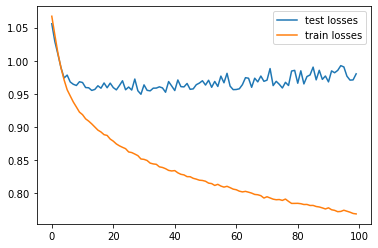

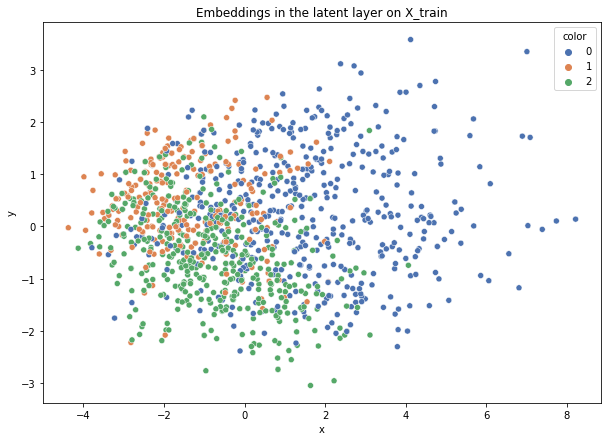

Softmax-f1: 0.508
Softmax-gmean: 0.5
Softmax-minority_gmean: 0.007


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


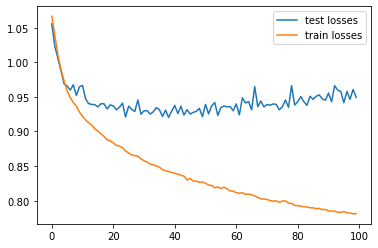

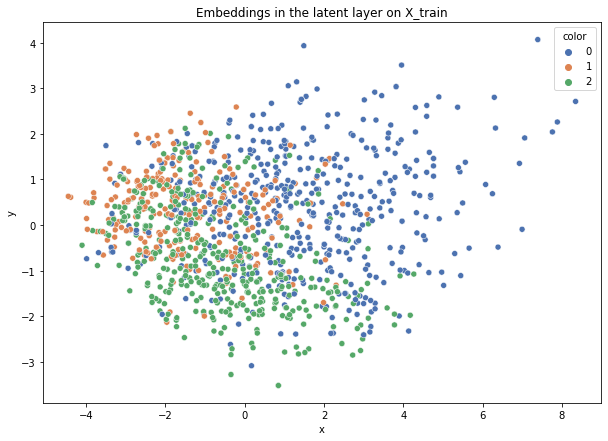

Softmax-f1: 0.528
Softmax-gmean: 0.515
Softmax-minority_gmean: 0.008


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


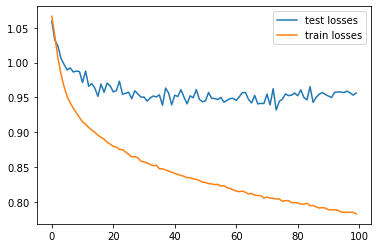

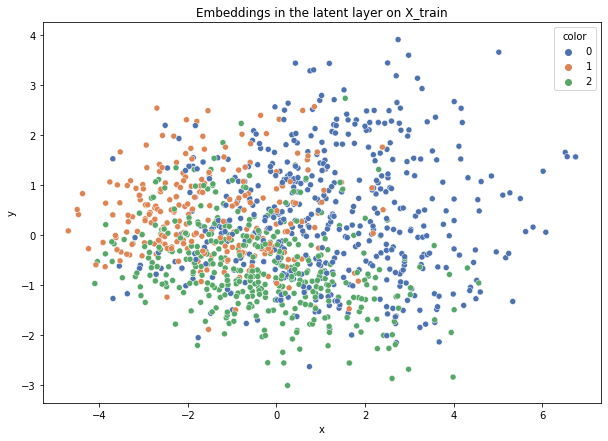

Softmax-f1: 0.512
Softmax-gmean: 0.482
Softmax-minority_gmean: 0.007


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


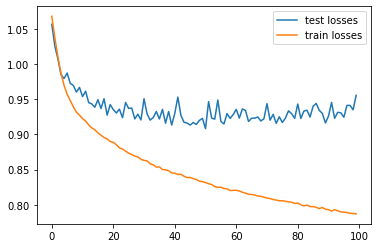

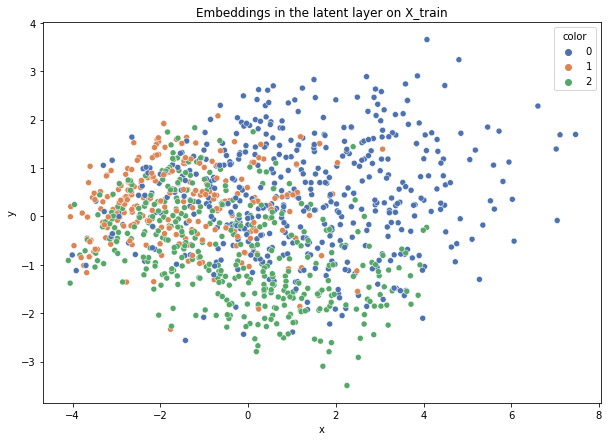

Softmax-f1: 0.496
Softmax-gmean: 0.458
Softmax-minority_gmean: 0.006


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


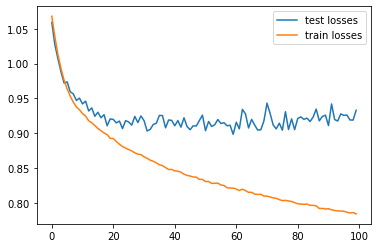

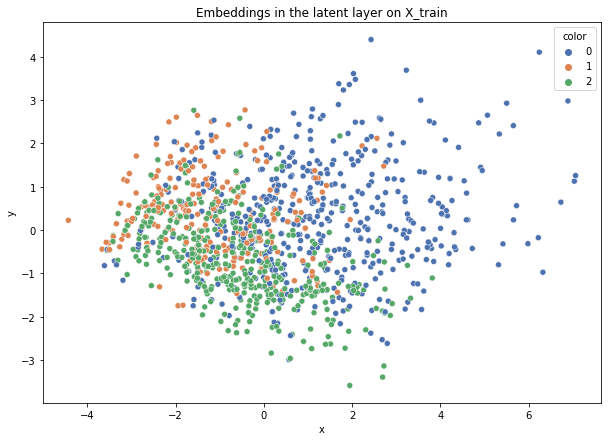

Softmax-f1: 0.556
Softmax-gmean: 0.538
Softmax-minority_gmean: 0.007
dermatology


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


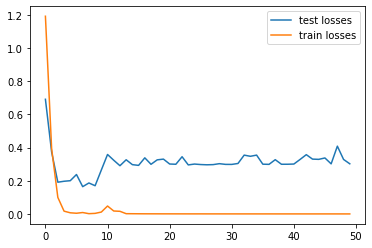

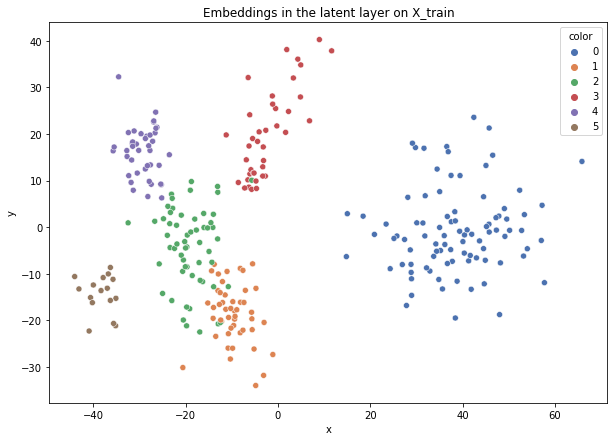

Softmax-f1: 0.93
Softmax-gmean: 0.922
Softmax-minority_gmean: 1.0


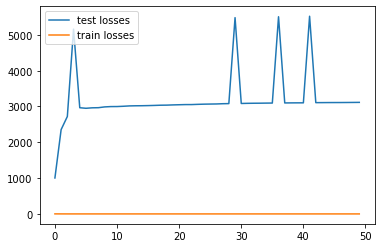

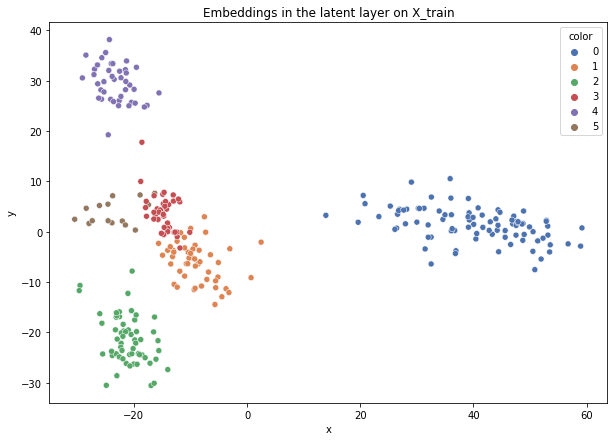

Softmax-f1: 0.927
Softmax-gmean: 0.923
Softmax-minority_gmean: 1.0


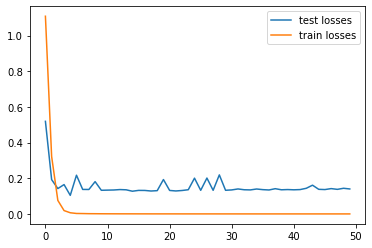

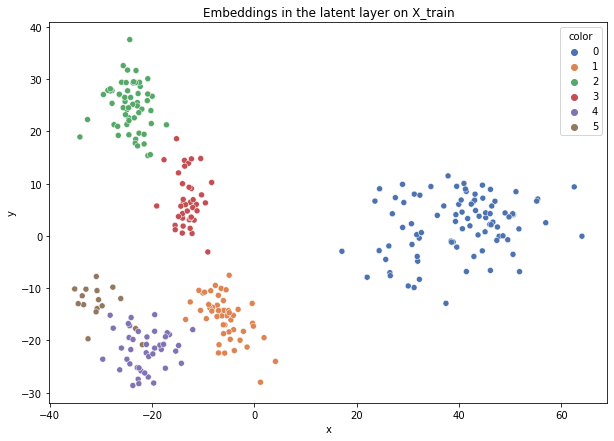

Softmax-f1: 0.969
Softmax-gmean: 0.963
Softmax-minority_gmean: 1.0


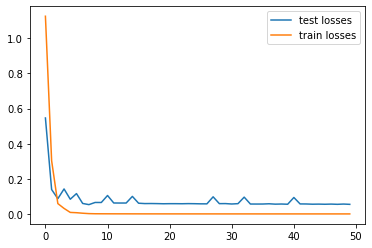

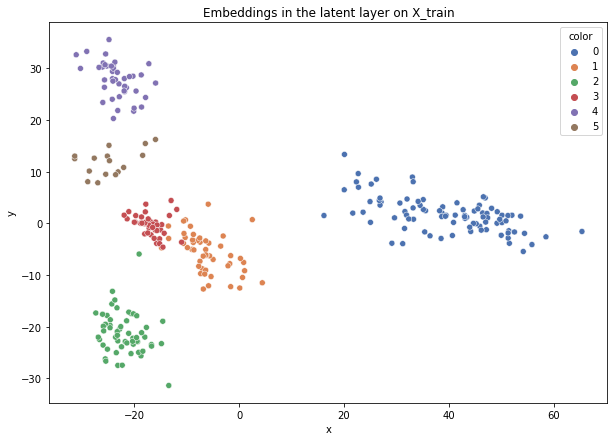

Softmax-f1: 0.985
Softmax-gmean: 0.986
Softmax-minority_gmean: 1.0


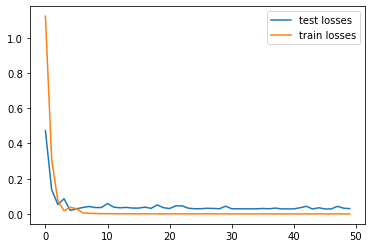

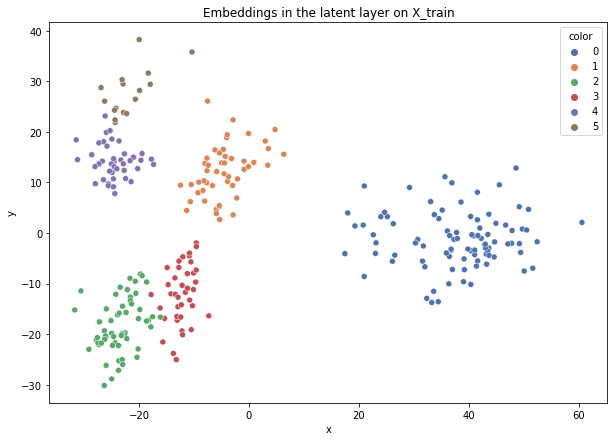

Softmax-f1: 0.989
Softmax-gmean: 0.992
Softmax-minority_gmean: 1.0
hayes-roth


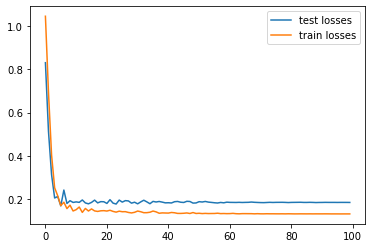

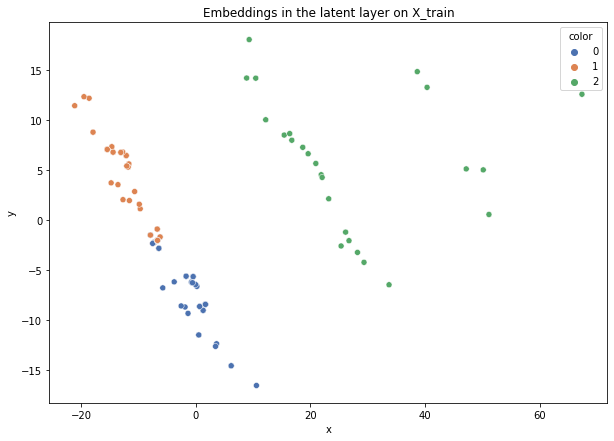

Softmax-f1: 0.897
Softmax-gmean: 0.892
Softmax-minority_gmean: 1.0


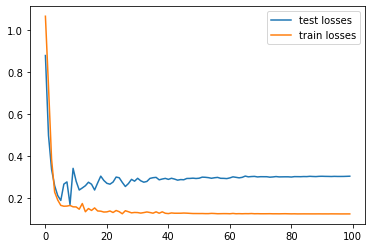

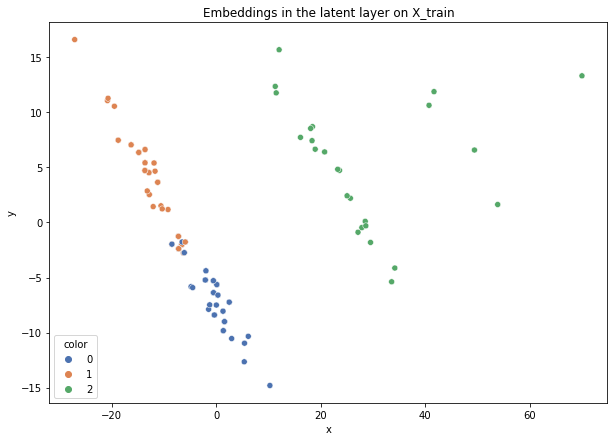

Softmax-f1: 0.872
Softmax-gmean: 0.867
Softmax-minority_gmean: 1.0


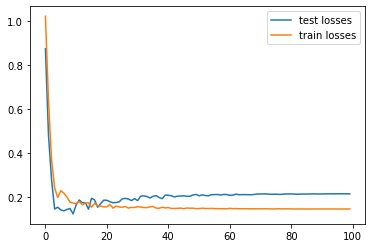

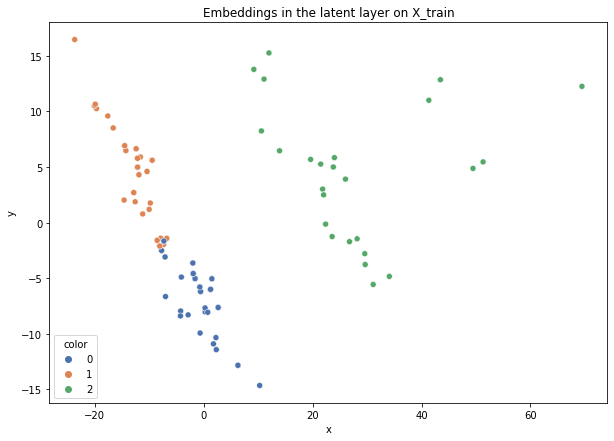

Softmax-f1: 0.923
Softmax-gmean: 0.921
Softmax-minority_gmean: 1.0


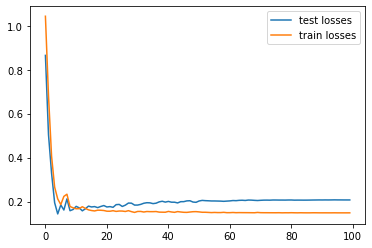

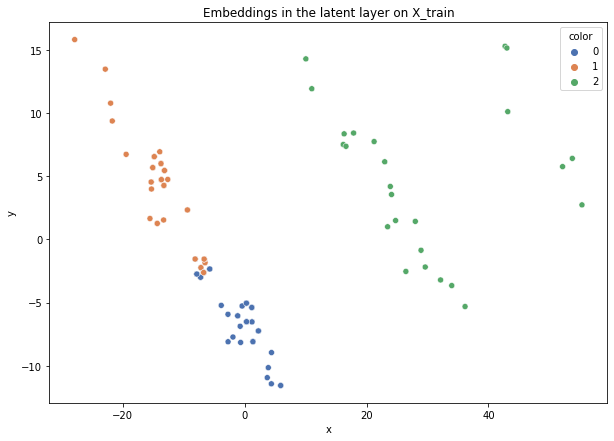

Softmax-f1: 0.949
Softmax-gmean: 0.948
Softmax-minority_gmean: 1.0


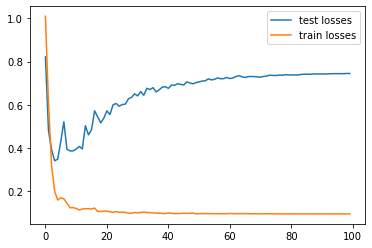

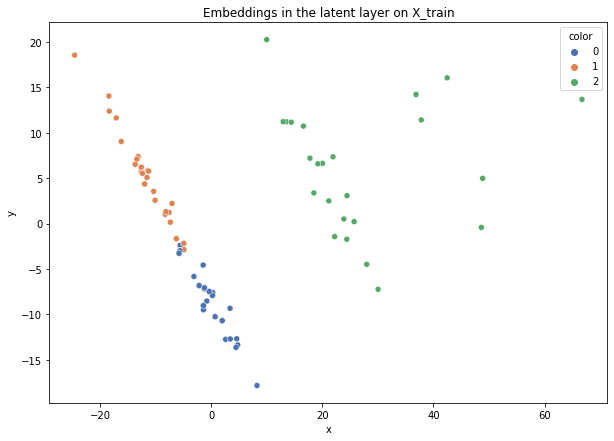

Softmax-f1: 0.786
Softmax-gmean: 0.773
Softmax-minority_gmean: 1.0
new_vehicle


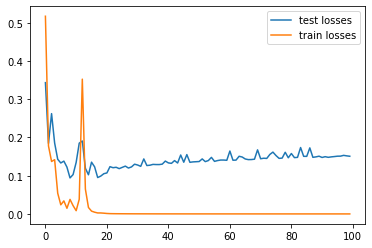

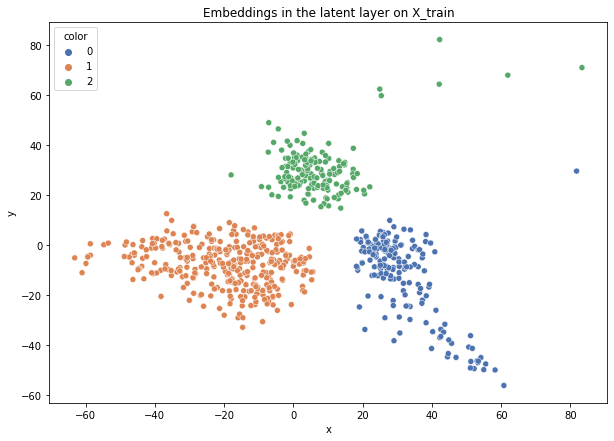

Softmax-f1: 0.953
Softmax-gmean: 0.957
Softmax-minority_gmean: 0.097


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


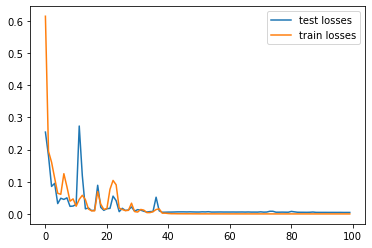

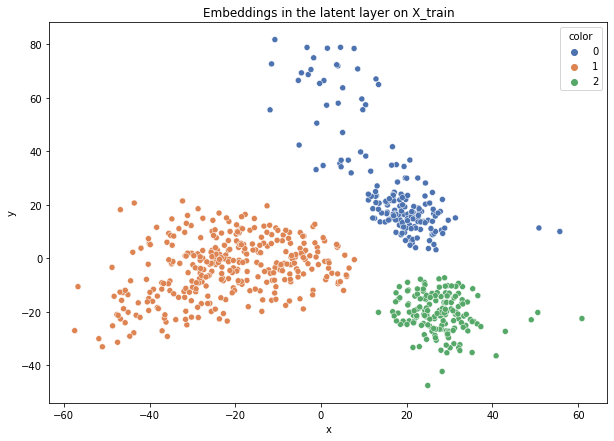

Softmax-f1: 1.0
Softmax-gmean: 1.0
Softmax-minority_gmean: 1.0


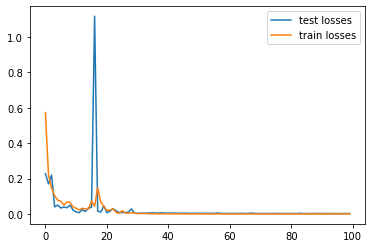

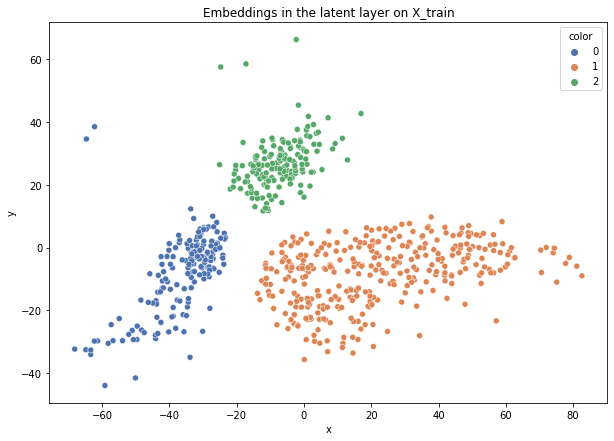

Softmax-f1: 1.0
Softmax-gmean: 1.0
Softmax-minority_gmean: 1.0


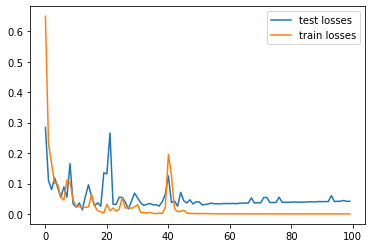

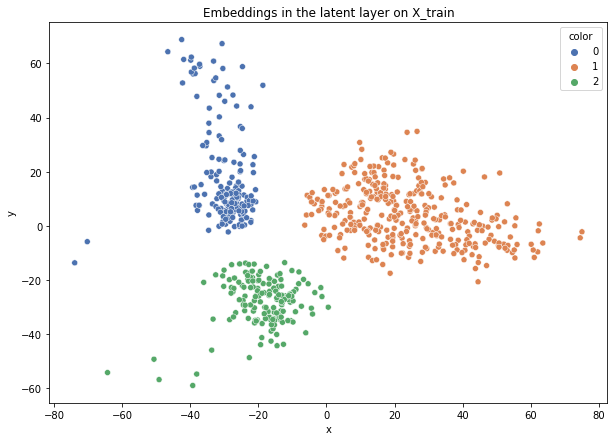

Softmax-f1: 0.988
Softmax-gmean: 0.988
Softmax-minority_gmean: 0.099


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


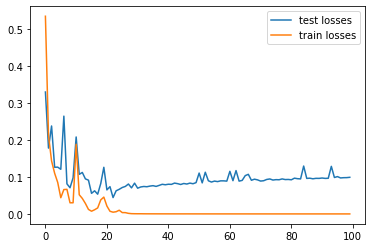

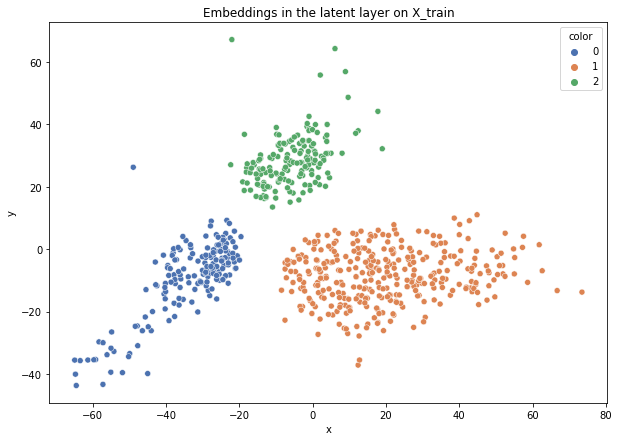

Softmax-f1: 0.963
Softmax-gmean: 0.96
Softmax-minority_gmean: 0.096
new_yeast


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


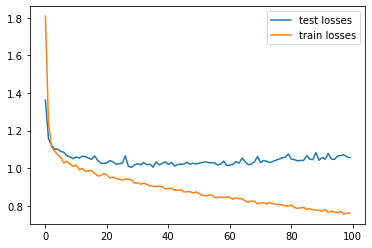

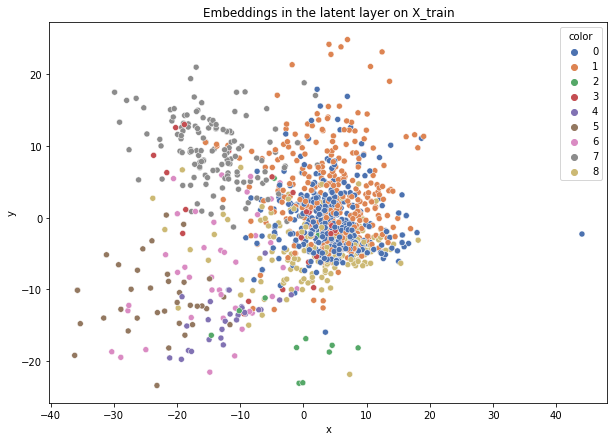

Softmax-f1: 0.572
Softmax-gmean: 0.313
Softmax-minority_gmean: 0.018


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


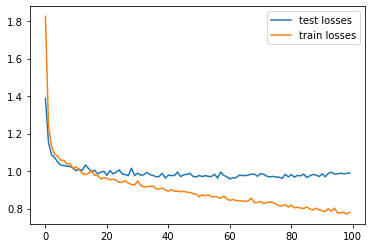

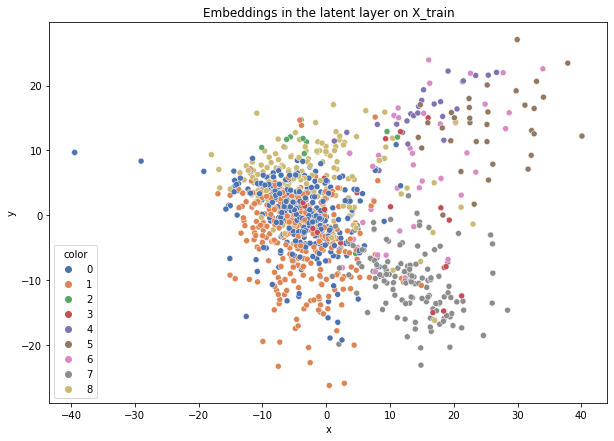

Softmax-f1: 0.594
Softmax-gmean: 0.314
Softmax-minority_gmean: 0.025


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


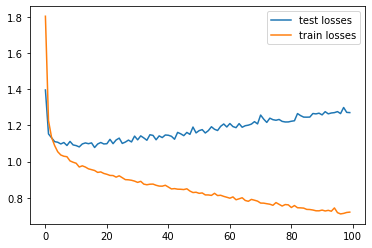

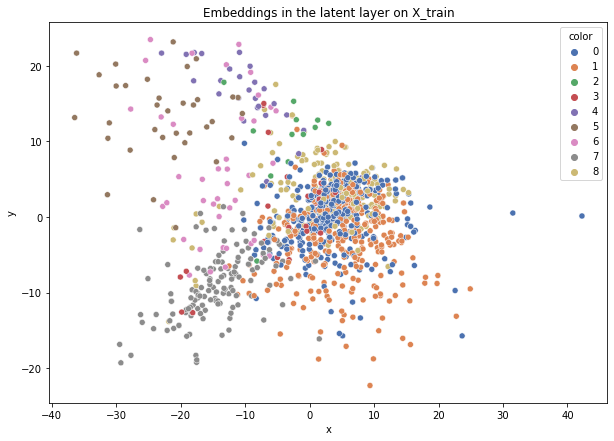

Softmax-f1: 0.494
Softmax-gmean: 0.268
Softmax-minority_gmean: 0.016


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


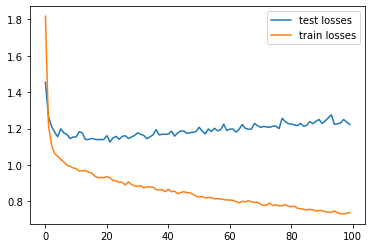

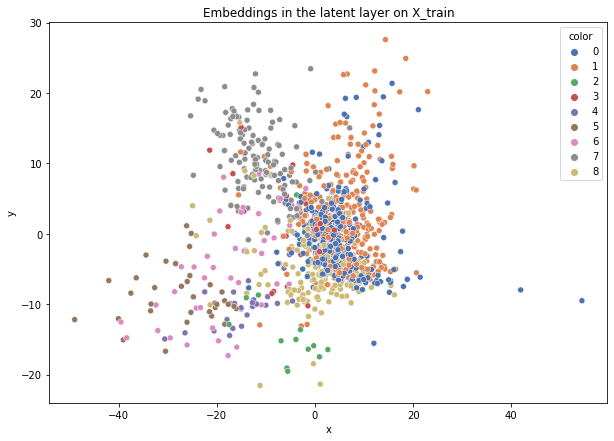

Softmax-f1: 0.492
Softmax-gmean: 0.251
Softmax-minority_gmean: 0.015


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


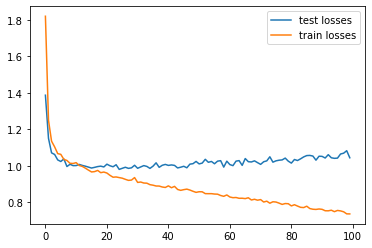

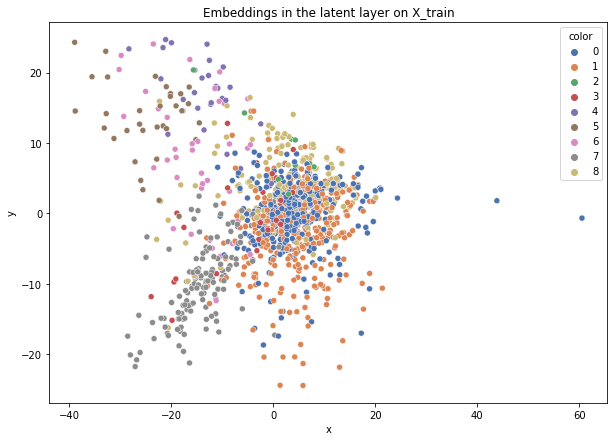

Softmax-f1: 0.543
Softmax-gmean: 0.283
Softmax-minority_gmean: 0.015
1czysty-cut


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


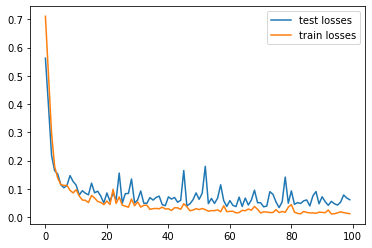

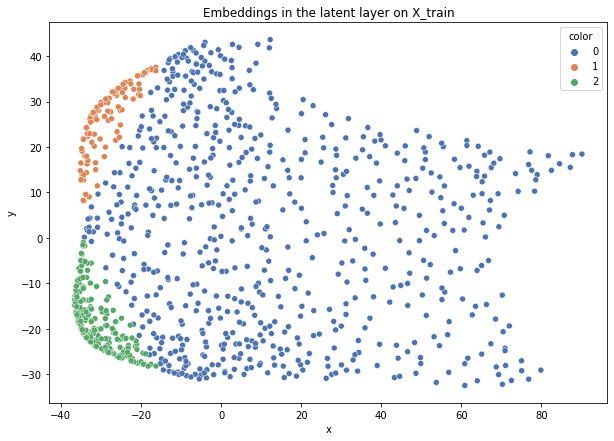

Softmax-f1: 0.961
Softmax-gmean: 0.942
Softmax-minority_gmean: 0.094


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


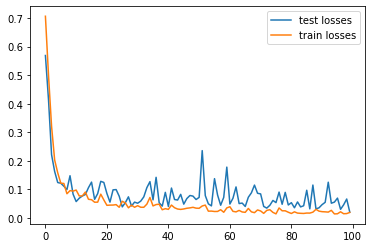

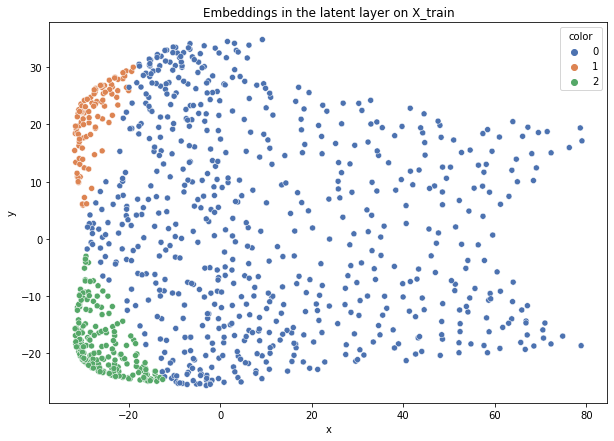

Softmax-f1: 0.987
Softmax-gmean: 0.984
Softmax-minority_gmean: 0.099


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


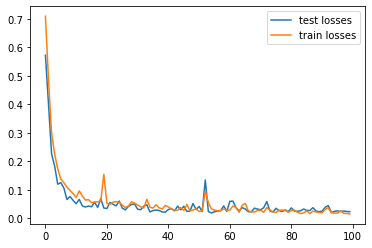

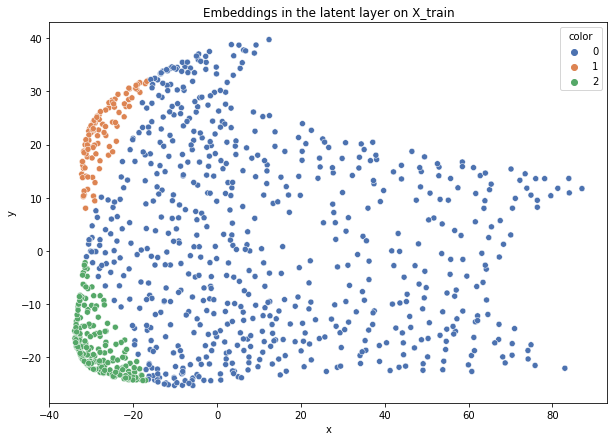

Softmax-f1: 0.984
Softmax-gmean: 0.971
Softmax-minority_gmean: 0.097


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


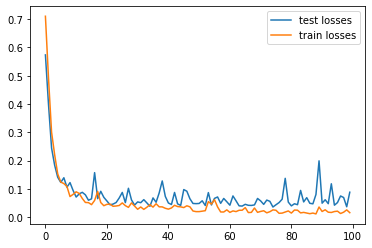

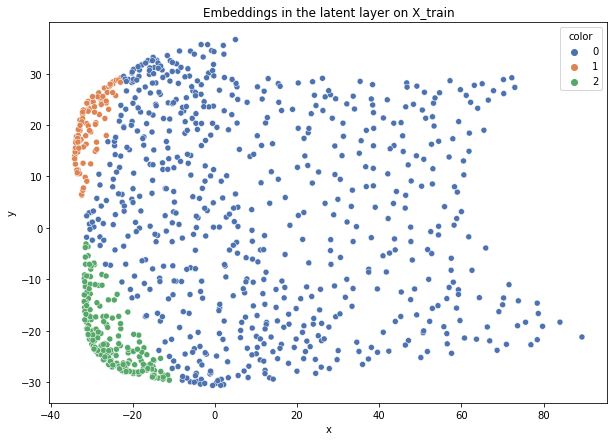

Softmax-f1: 0.946
Softmax-gmean: 0.982
Softmax-minority_gmean: 1.0


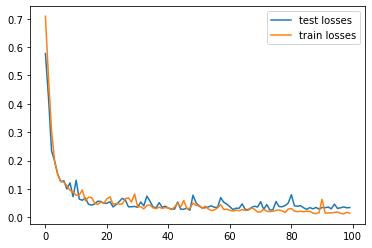

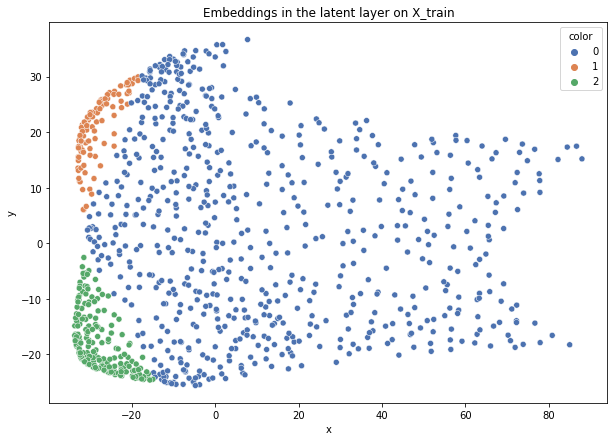

Softmax-f1: 0.983
Softmax-gmean: 0.977
Softmax-minority_gmean: 0.098
2delikatne-cut


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


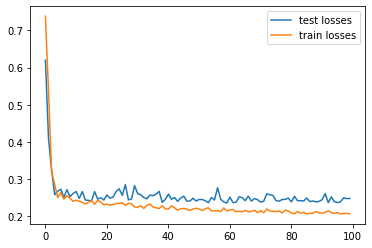

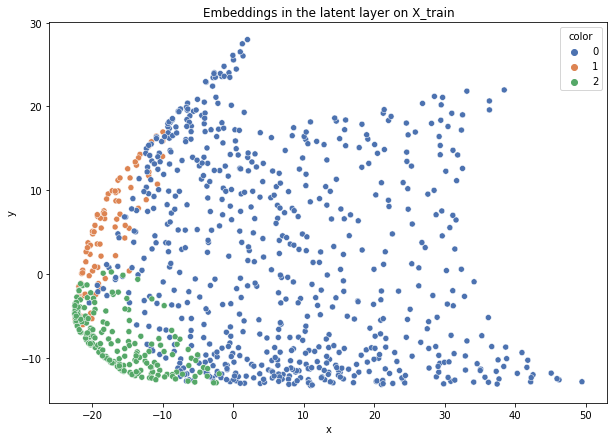

Softmax-f1: 0.794
Softmax-gmean: 0.743
Softmax-minority_gmean: 0.075


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


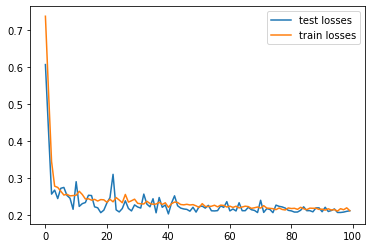

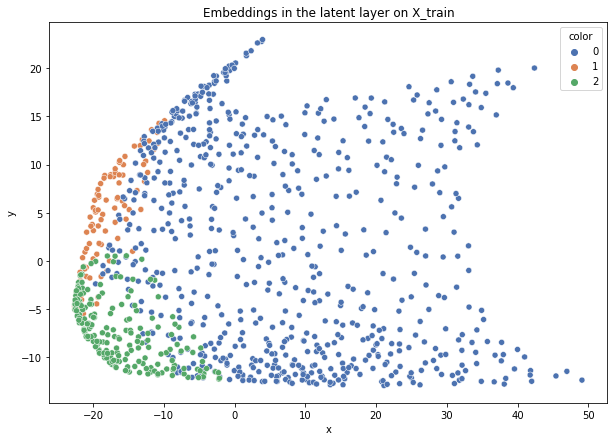

Softmax-f1: 0.819
Softmax-gmean: 0.777
Softmax-minority_gmean: 0.079


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


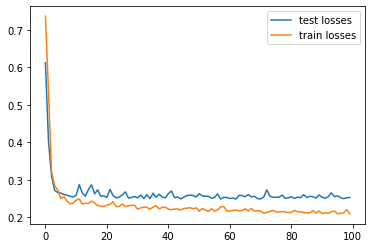

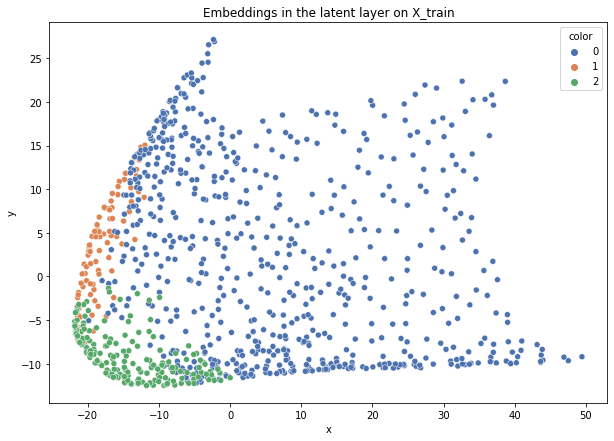

Softmax-f1: 0.783
Softmax-gmean: 0.733
Softmax-minority_gmean: 0.074


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


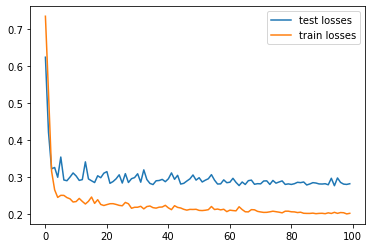

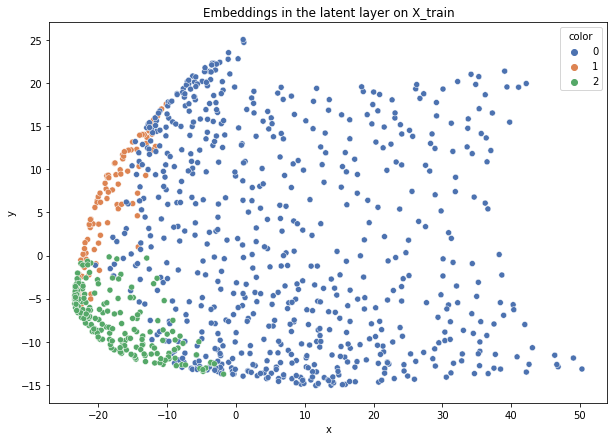

Softmax-f1: 0.779
Softmax-gmean: 0.765
Softmax-minority_gmean: 0.079


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


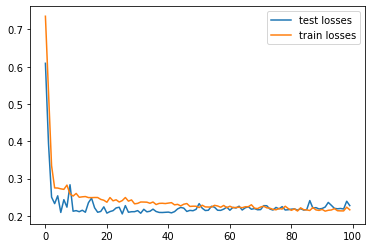

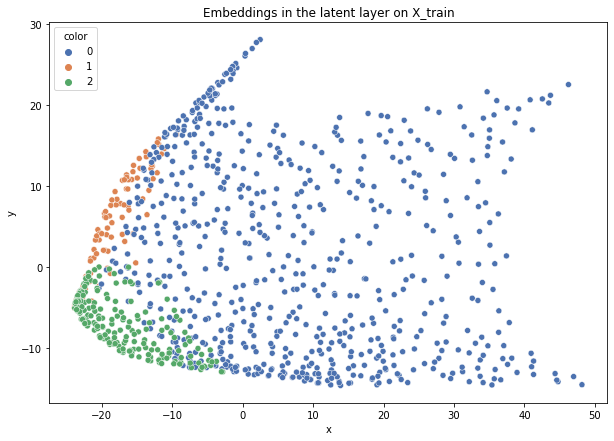

Softmax-f1: 0.78
Softmax-gmean: 0.707
Softmax-minority_gmean: 0.071
3mocniej-cut


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


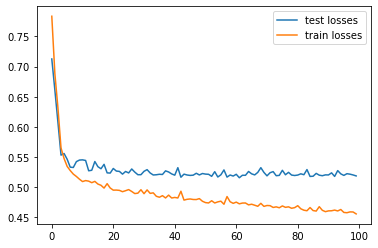

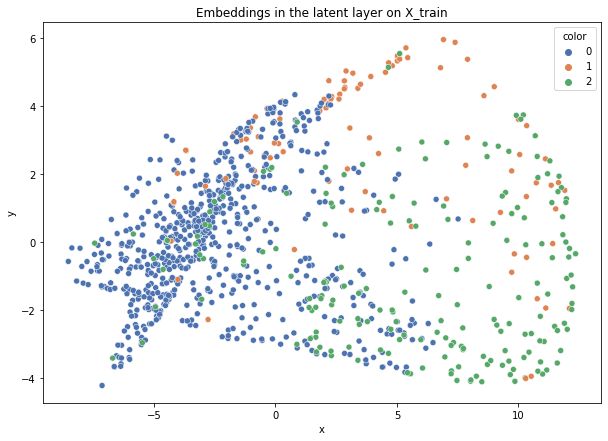

Softmax-f1: 0.621
Softmax-gmean: 0.534
Softmax-minority_gmean: 0.054


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


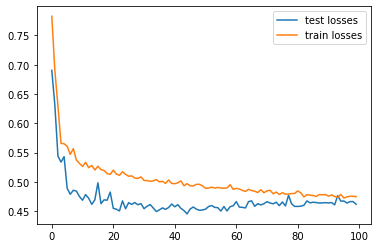

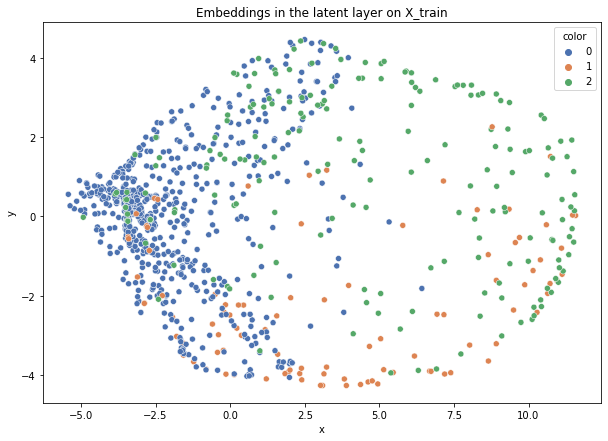

Softmax-f1: 0.687
Softmax-gmean: 0.584
Softmax-minority_gmean: 0.059


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


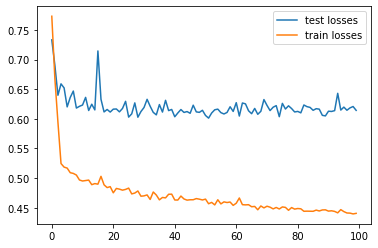

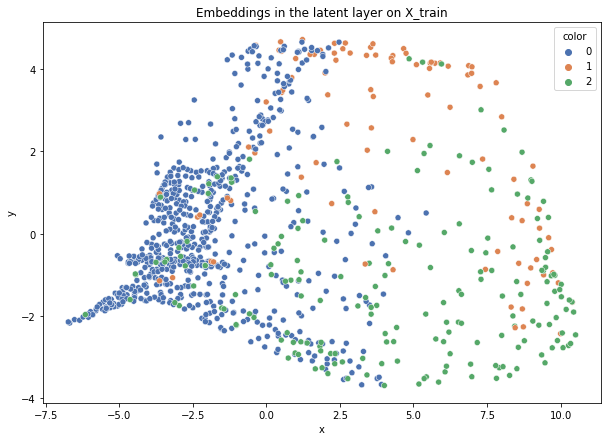

Softmax-f1: 0.577
Softmax-gmean: 0.432
Softmax-minority_gmean: 0.044


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


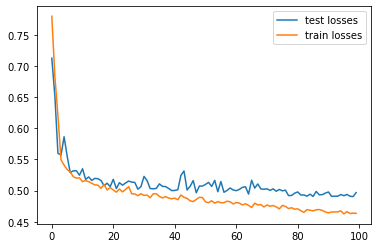

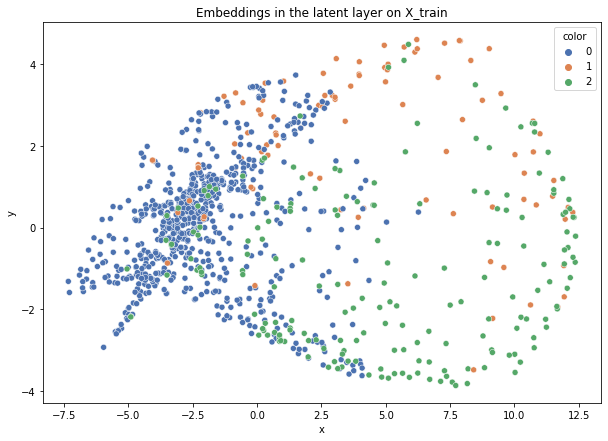

Softmax-f1: 0.636
Softmax-gmean: 0.528
Softmax-minority_gmean: 0.053


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


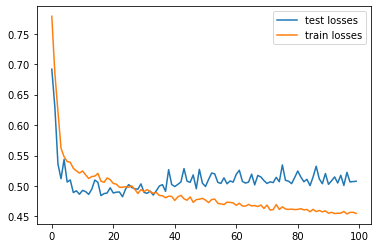

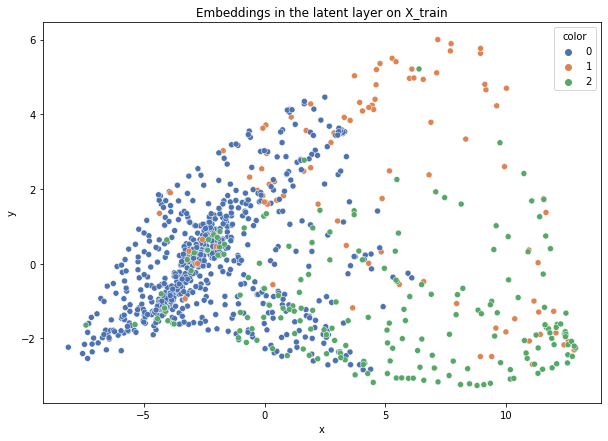

Softmax-f1: 0.581
Softmax-gmean: 0.424
Softmax-minority_gmean: 0.043
4delikatne-bezover-cut


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


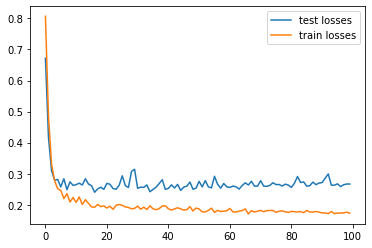

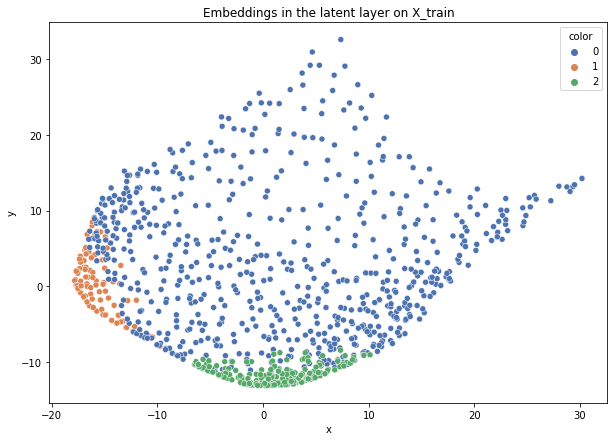

Softmax-f1: 0.841
Softmax-gmean: 0.81
Softmax-minority_gmean: 0.082


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


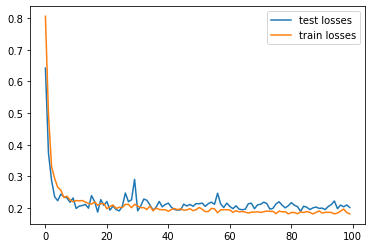

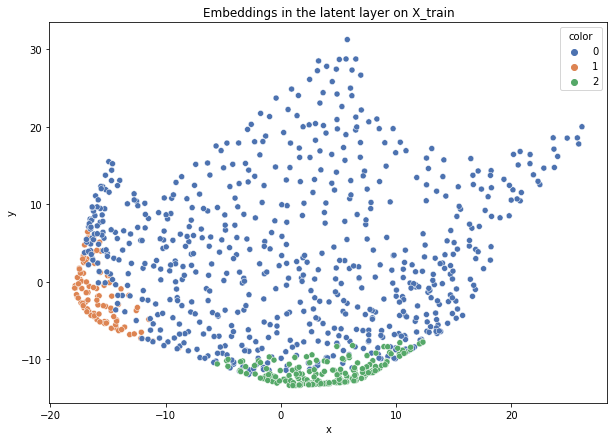

Softmax-f1: 0.861
Softmax-gmean: 0.846
Softmax-minority_gmean: 0.086


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


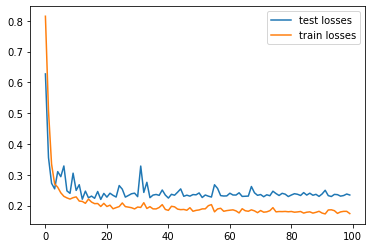

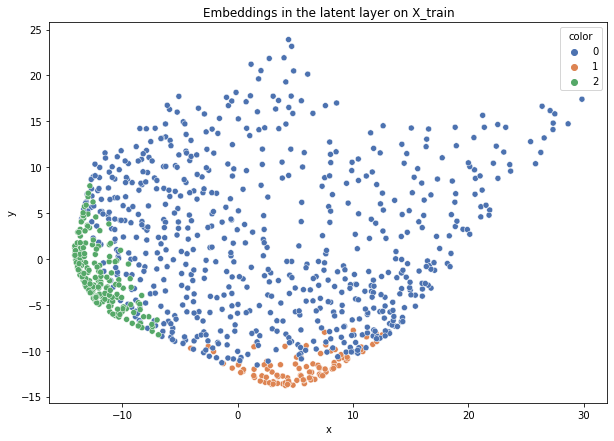

Softmax-f1: 0.812
Softmax-gmean: 0.787
Softmax-minority_gmean: 0.081


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


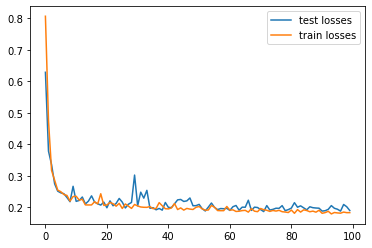

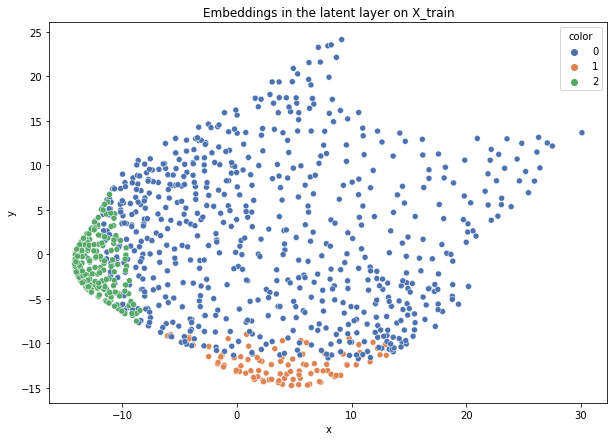

Softmax-f1: 0.858
Softmax-gmean: 0.856
Softmax-minority_gmean: 0.088


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


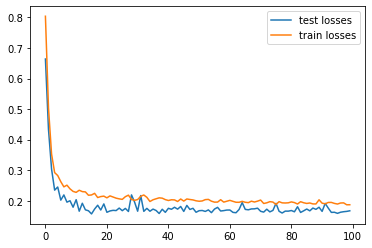

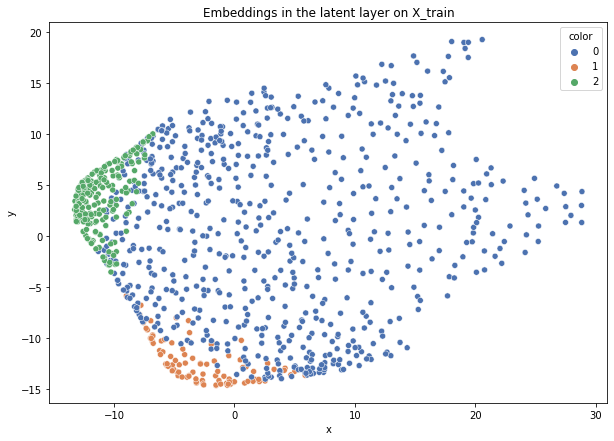

Softmax-f1: 0.883
Softmax-gmean: 0.888
Softmax-minority_gmean: 0.091
balance-scale


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


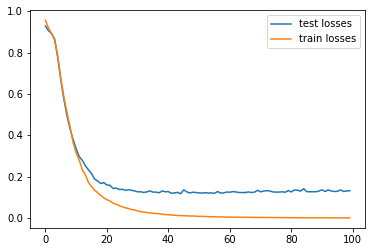

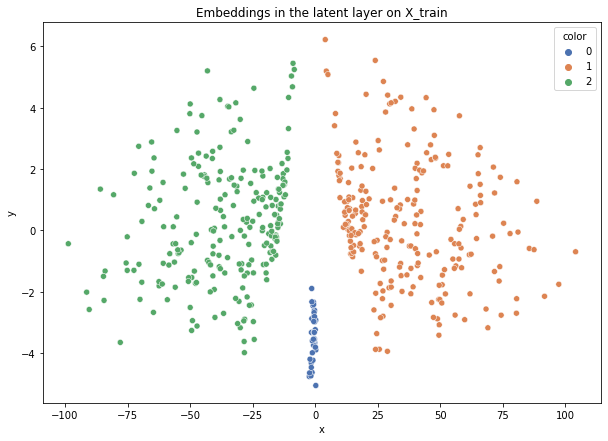

Softmax-f1: 0.922
Softmax-gmean: 0.943
Softmax-minority_gmean: 0.03


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


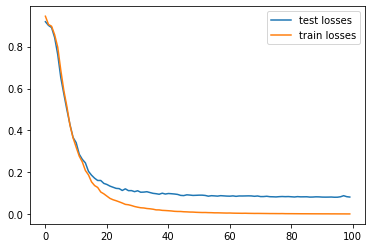

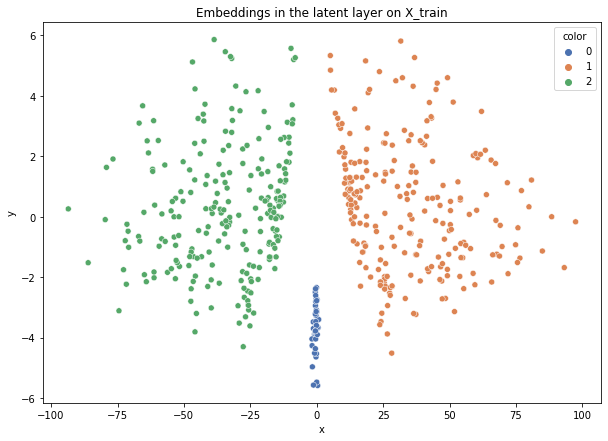

Softmax-f1: 0.922
Softmax-gmean: 0.943
Softmax-minority_gmean: 0.03


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


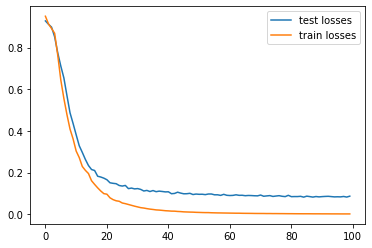

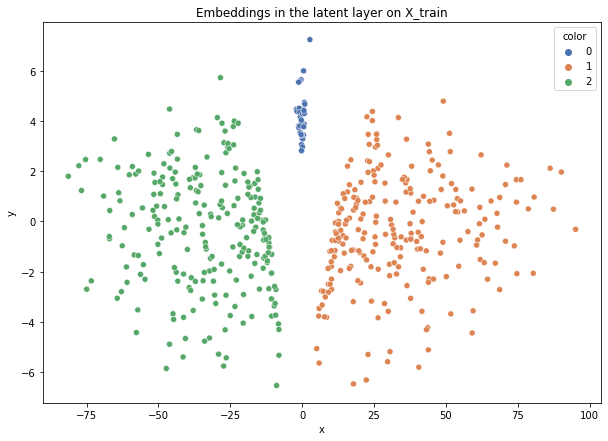

Softmax-f1: 0.882
Softmax-gmean: 0.872
Softmax-minority_gmean: 0.009


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


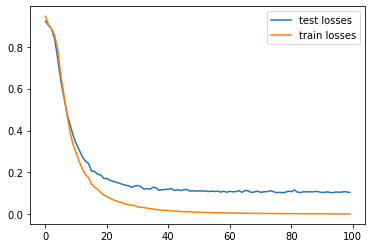

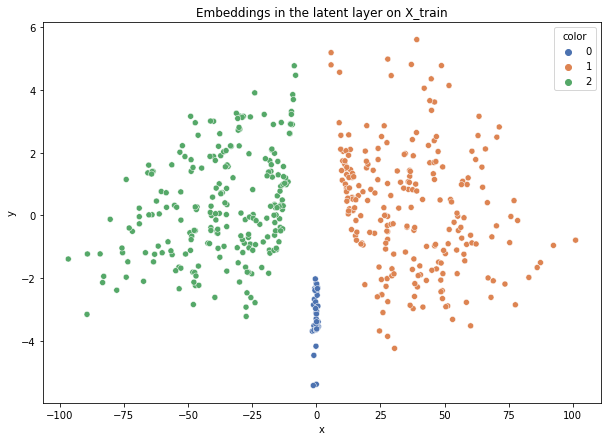

Softmax-f1: 0.946
Softmax-gmean: 0.971
Softmax-minority_gmean: 1.0


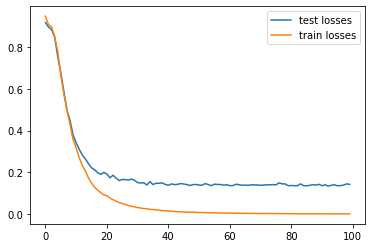

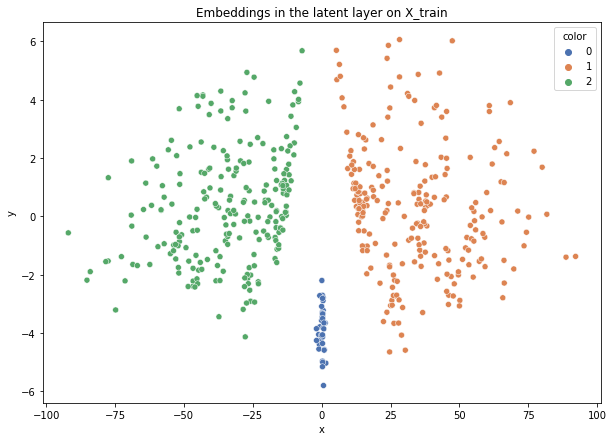

Softmax-f1: 0.857
Softmax-gmean: 0.882
Softmax-minority_gmean: 0.028
cleveland


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


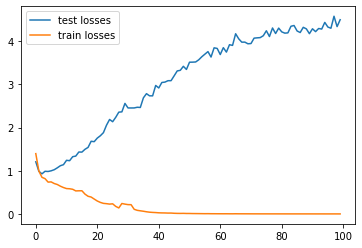

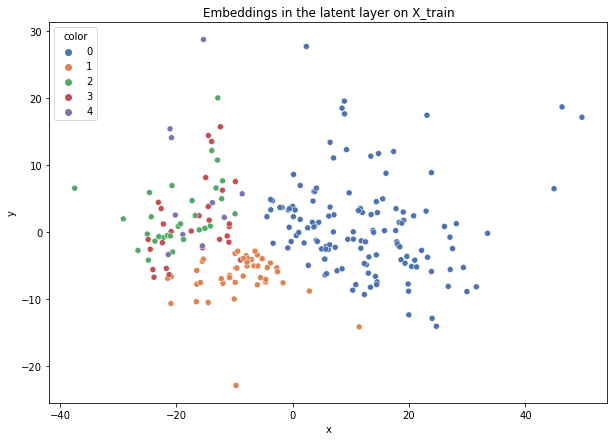

Softmax-f1: 0.345
Softmax-gmean: 0.106
Softmax-minority_gmean: 0.027


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


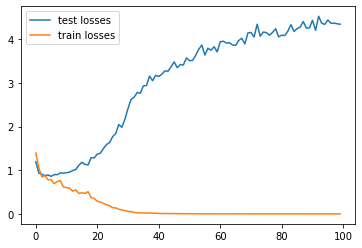

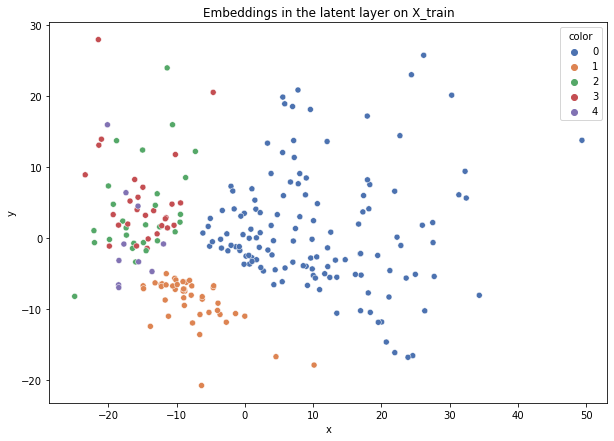

Softmax-f1: 0.312
Softmax-gmean: 0.092
Softmax-minority_gmean: 0.024


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


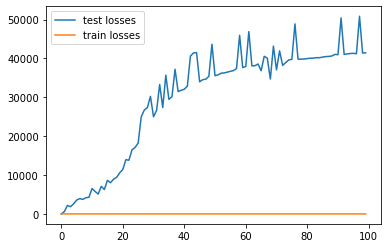

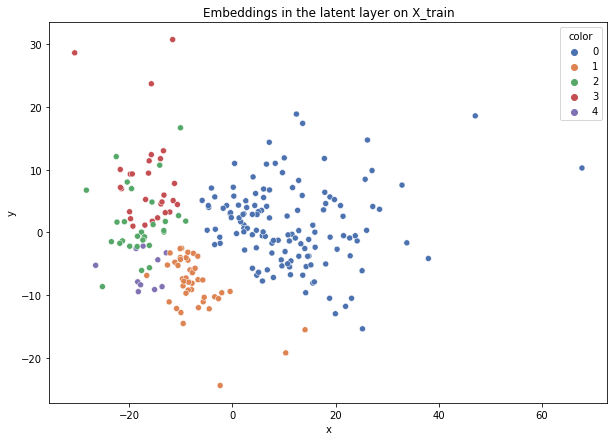

Softmax-f1: 0.27
Softmax-gmean: 0.088
Softmax-minority_gmean: 0.024


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


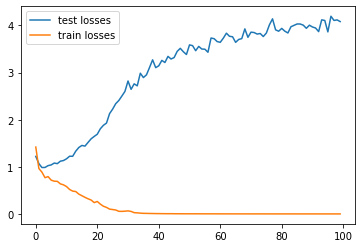

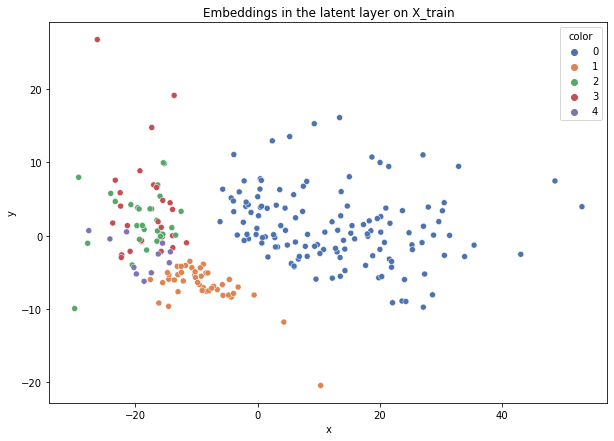

Softmax-f1: 0.301
Softmax-gmean: 0.102
Softmax-minority_gmean: 0.027


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


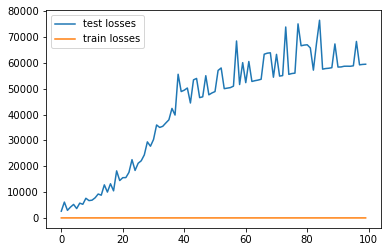

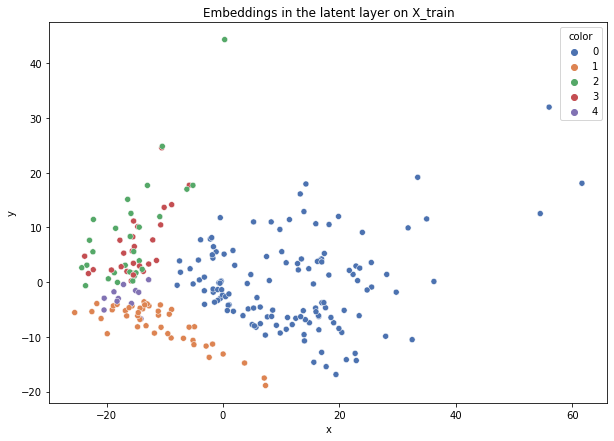

Softmax-f1: 0.317
Softmax-gmean: 0.091
Softmax-minority_gmean: 0.023
cleveland_v2


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


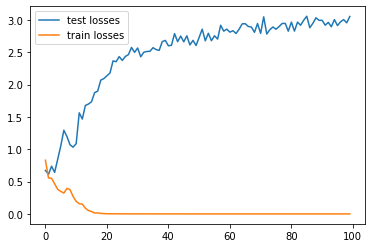

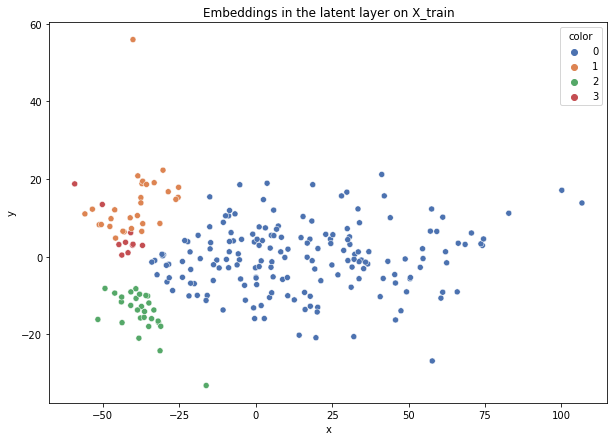

Softmax-f1: 0.298
Softmax-gmean: 0.065
Softmax-minority_gmean: 0.012


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


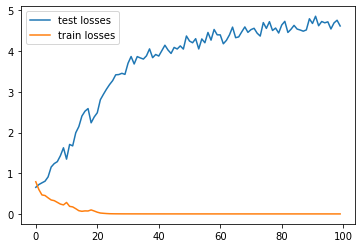

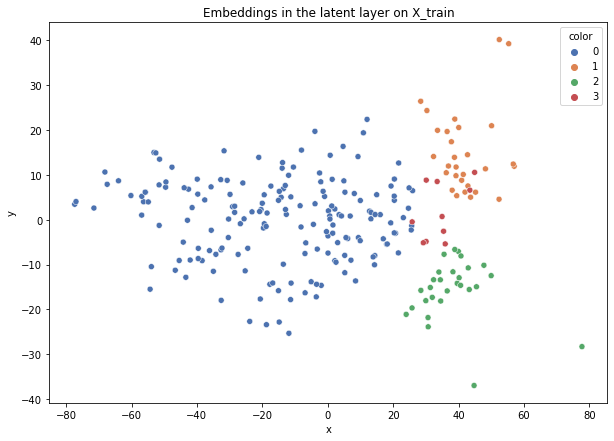

Softmax-f1: 0.308
Softmax-gmean: 0.076
Softmax-minority_gmean: 0.014


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


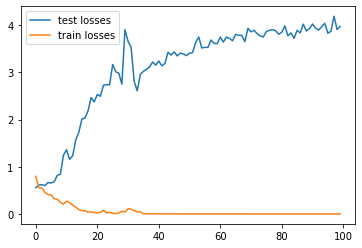

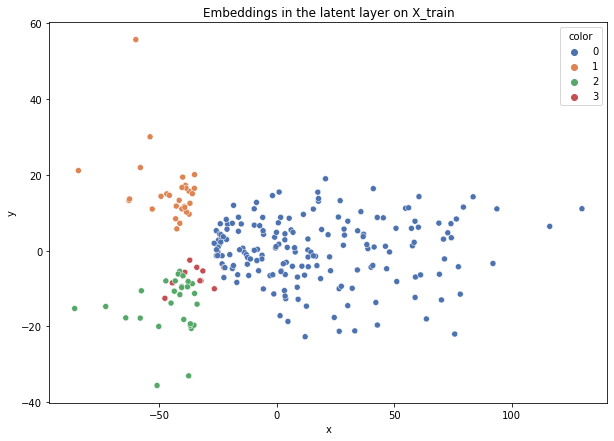

Softmax-f1: 0.287
Softmax-gmean: 0.065
Softmax-minority_gmean: 0.012


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


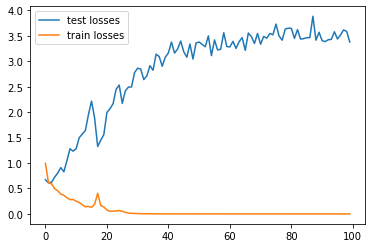

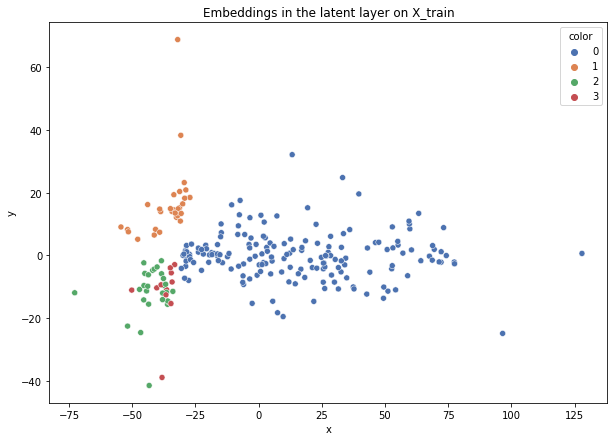

Softmax-f1: 0.384
Softmax-gmean: 0.088
Softmax-minority_gmean: 0.016


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


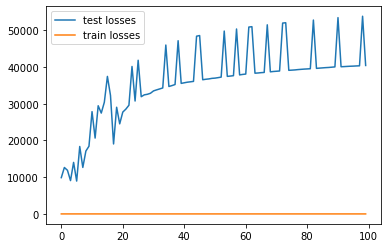

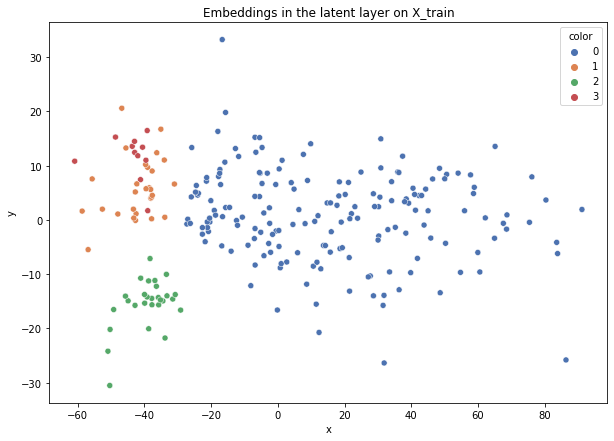

Softmax-f1: 0.311
Softmax-gmean: 0.073
Softmax-minority_gmean: 0.014
glass


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


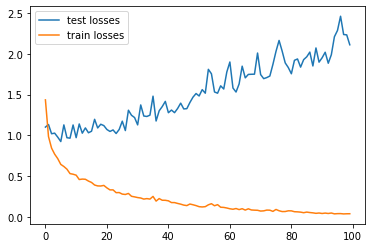

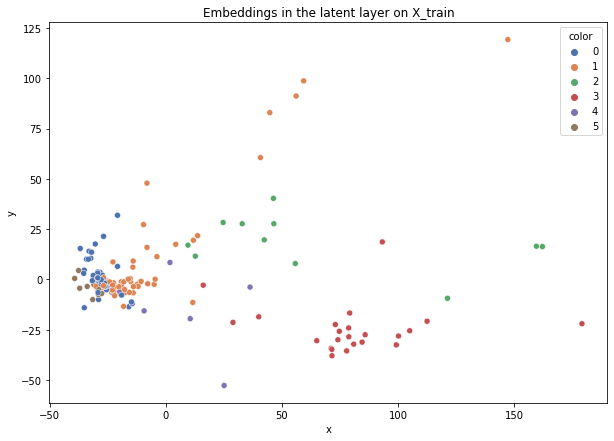

Softmax-f1: 0.55
Softmax-gmean: 0.198
Softmax-minority_gmean: 0.007


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


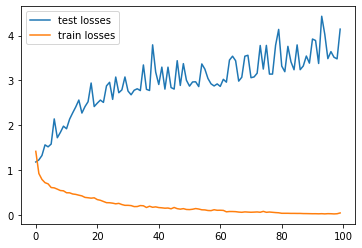

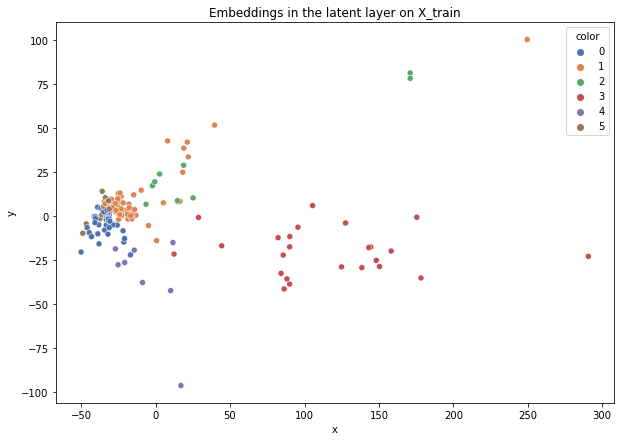

Softmax-f1: 0.662
Softmax-gmean: 0.259
Softmax-minority_gmean: 0.009


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


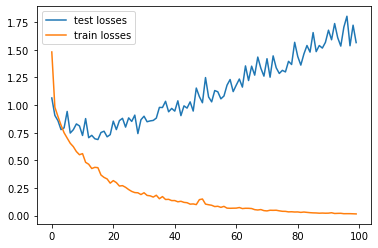

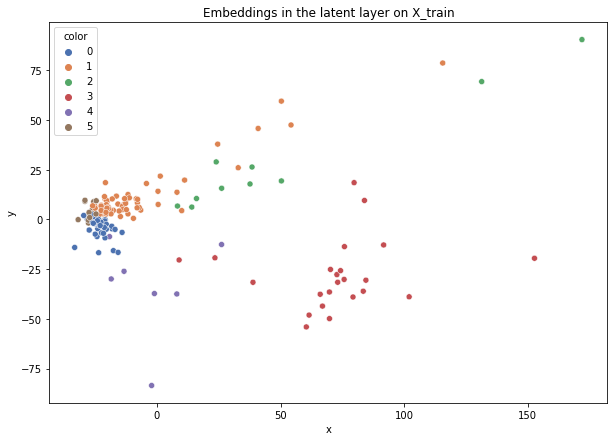

Softmax-f1: 0.749
Softmax-gmean: 0.656
Softmax-minority_gmean: 0.044


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


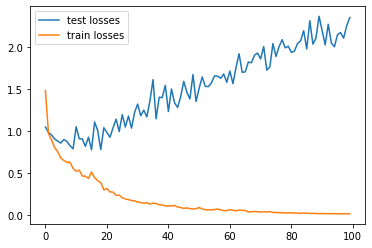

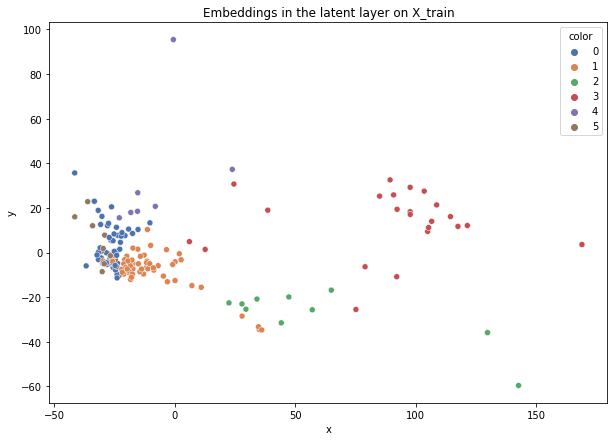

Softmax-f1: 0.646
Softmax-gmean: 0.6
Softmax-minority_gmean: 0.041


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


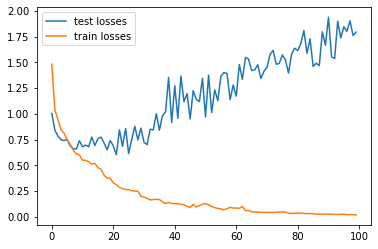

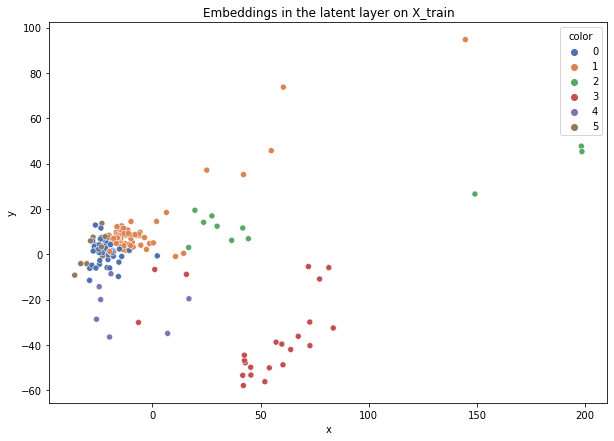

Softmax-f1: 0.801
Softmax-gmean: 0.782
Softmax-minority_gmean: 0.15
new_ecoli


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


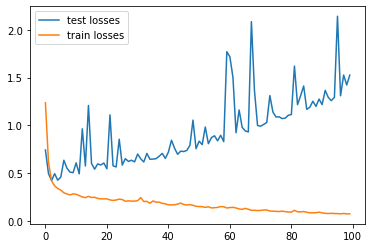

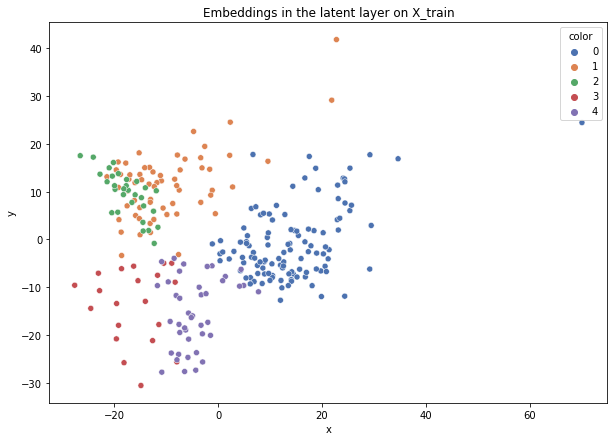

Softmax-f1: 0.787
Softmax-gmean: 0.757
Softmax-minority_gmean: 0.053


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


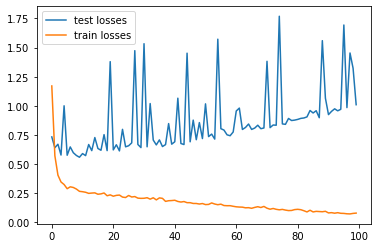

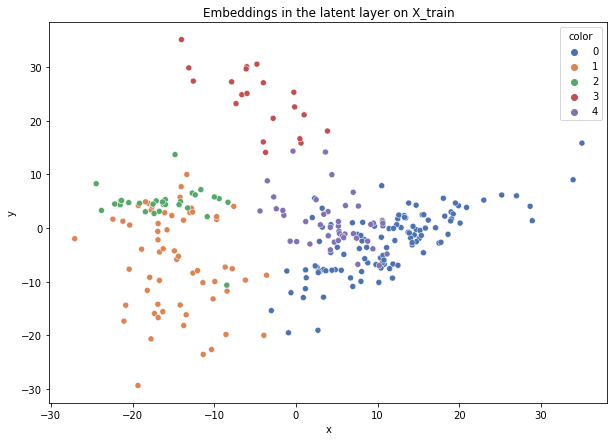

Softmax-f1: 0.799
Softmax-gmean: 0.787
Softmax-minority_gmean: 0.053


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


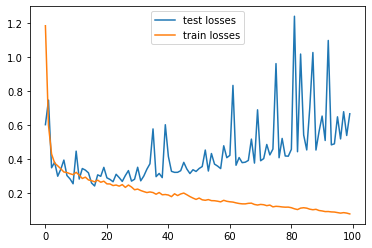

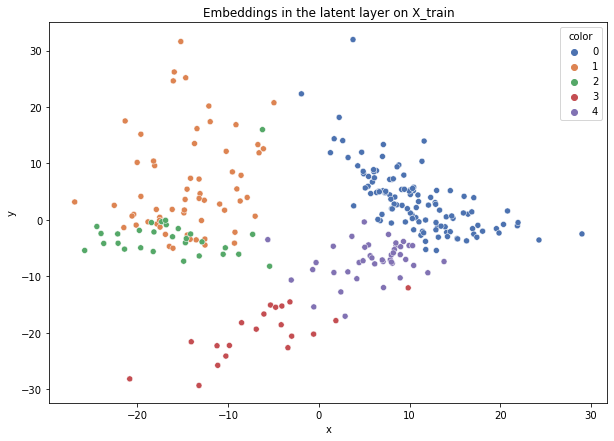

Softmax-f1: 0.794
Softmax-gmean: 0.747
Softmax-minority_gmean: 0.05


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


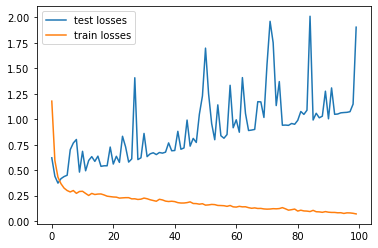

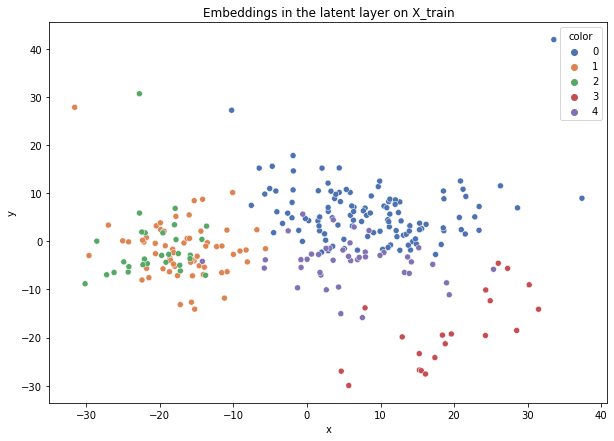

Softmax-f1: 0.755
Softmax-gmean: 0.729
Softmax-minority_gmean: 0.049


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


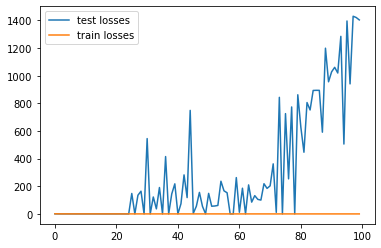

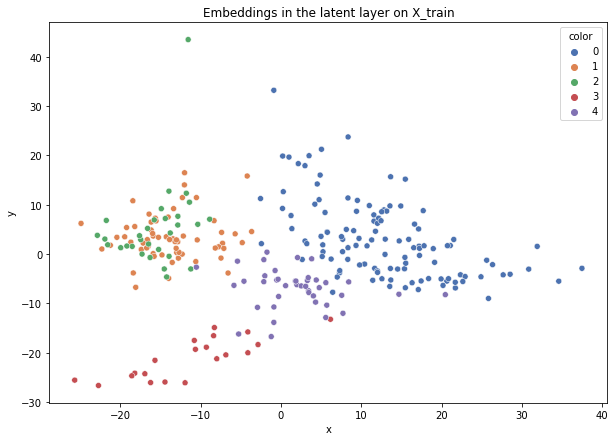

Softmax-f1: 0.774
Softmax-gmean: 0.741
Softmax-minority_gmean: 0.133
new_led7digit


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


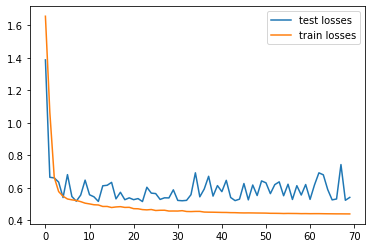

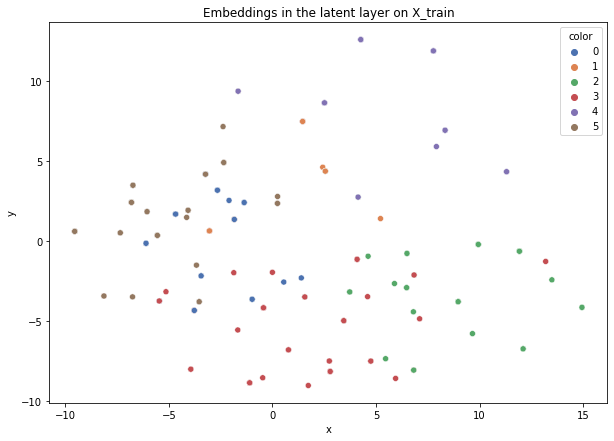

Softmax-f1: 0.786
Softmax-gmean: 0.772
Softmax-minority_gmean: 0.013


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


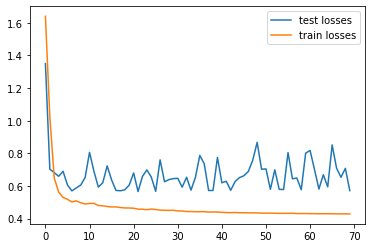

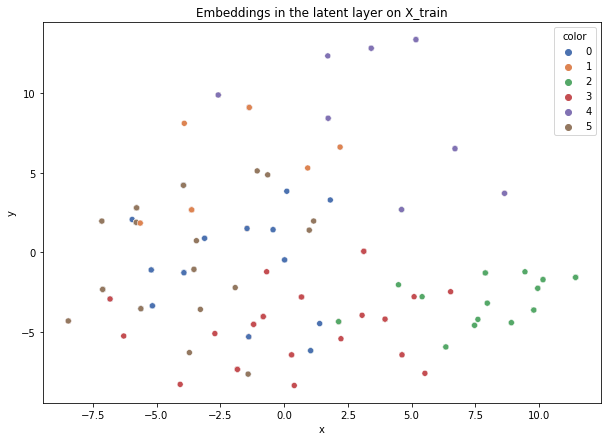

Softmax-f1: 0.764
Softmax-gmean: 0.724
Softmax-minority_gmean: 0.012


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


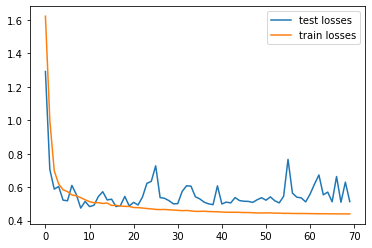

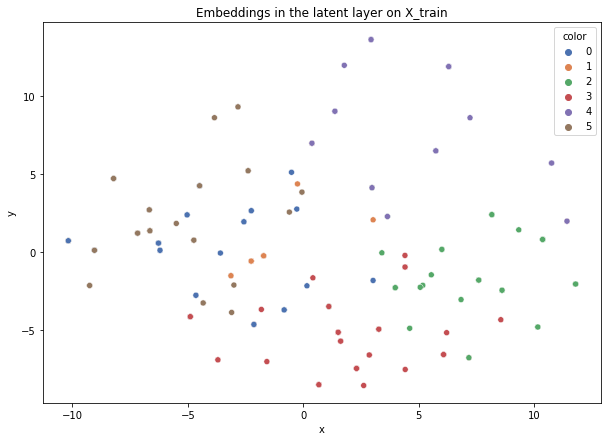

Softmax-f1: 0.778
Softmax-gmean: 0.769
Softmax-minority_gmean: 0.077


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


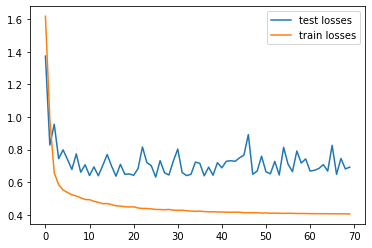

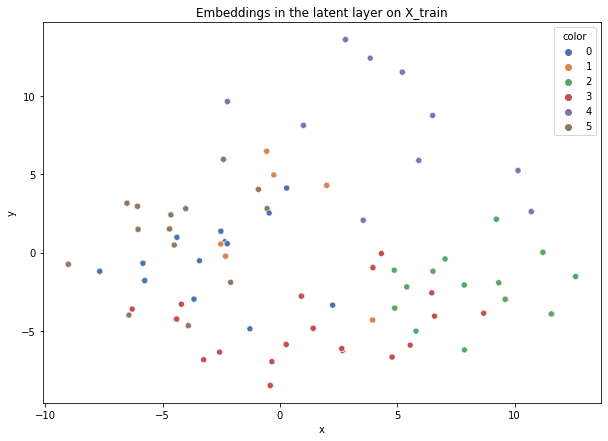

Softmax-f1: 0.727
Softmax-gmean: 0.715
Softmax-minority_gmean: 0.029


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


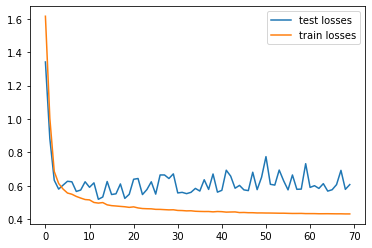

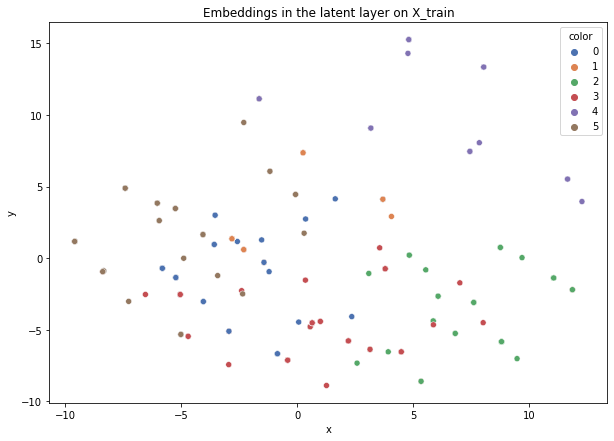

Softmax-f1: 0.786
Softmax-gmean: 0.788
Softmax-minority_gmean: 0.026
new_winequality-red


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


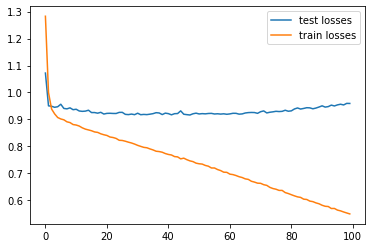

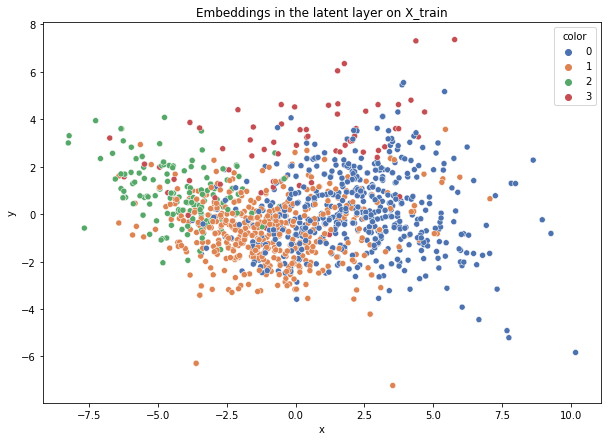

Softmax-f1: 0.498
Softmax-gmean: 0.4
Softmax-minority_gmean: 0.015


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


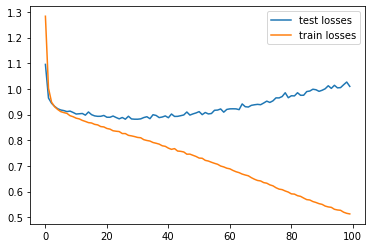

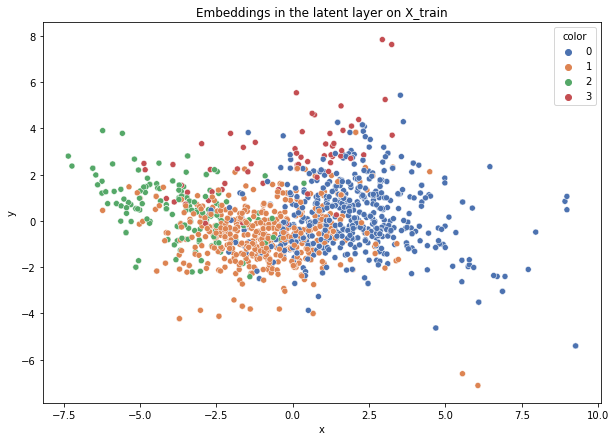

Softmax-f1: 0.467
Softmax-gmean: 0.332
Softmax-minority_gmean: 0.013


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


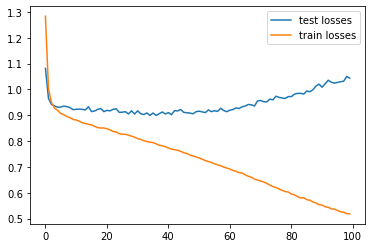

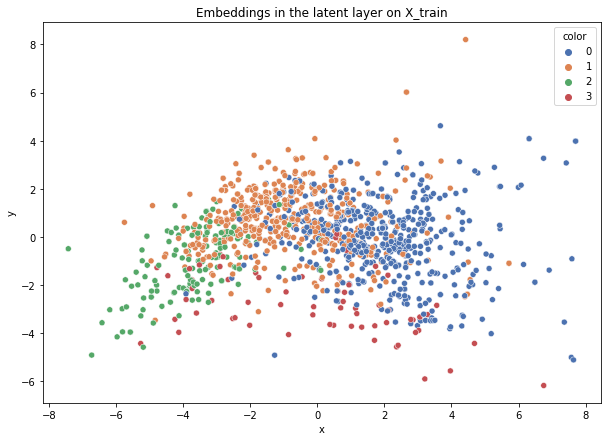

Softmax-f1: 0.517
Softmax-gmean: 0.427
Softmax-minority_gmean: 0.017


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


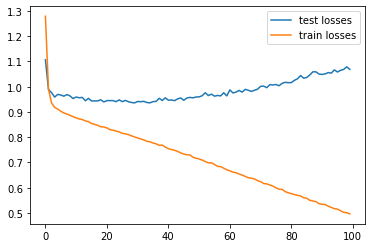

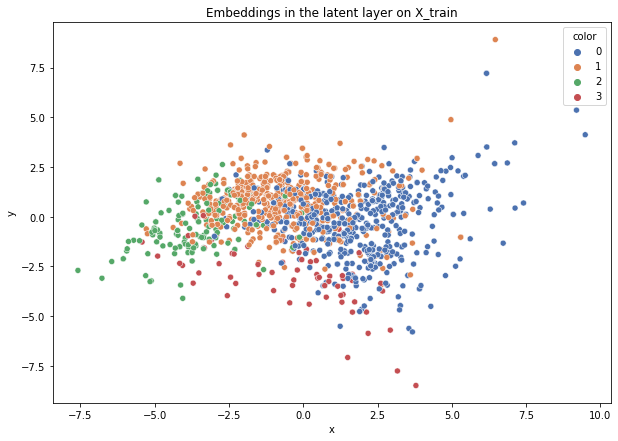

Softmax-f1: 0.423
Softmax-gmean: 0.114
Softmax-minority_gmean: 0.005


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


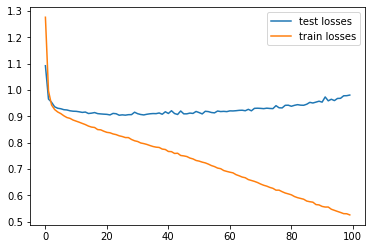

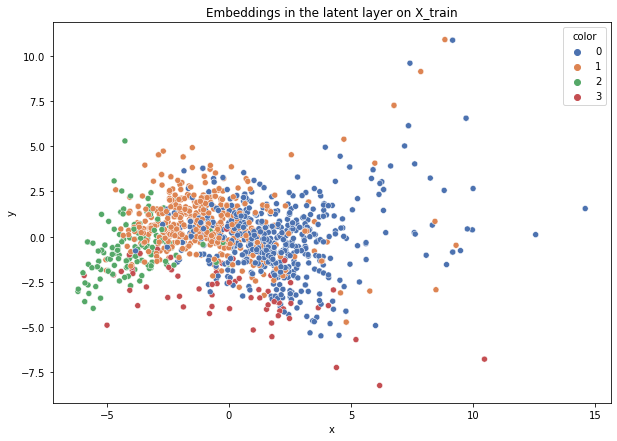

Softmax-f1: 0.583
Softmax-gmean: 0.523
Softmax-minority_gmean: 0.02
thyroid-newthyroid


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


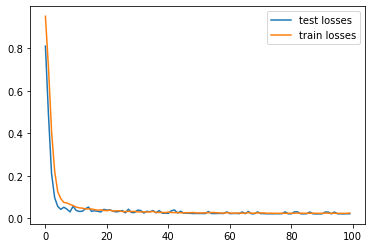

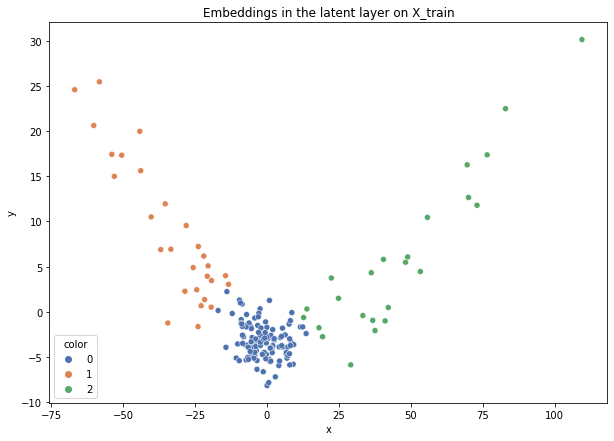

Softmax-f1: 0.964
Softmax-gmean: 0.941
Softmax-minority_gmean: 0.094


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


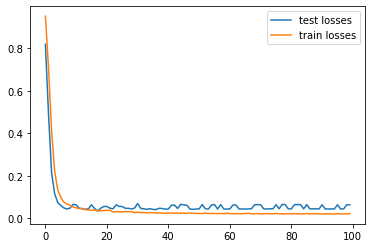

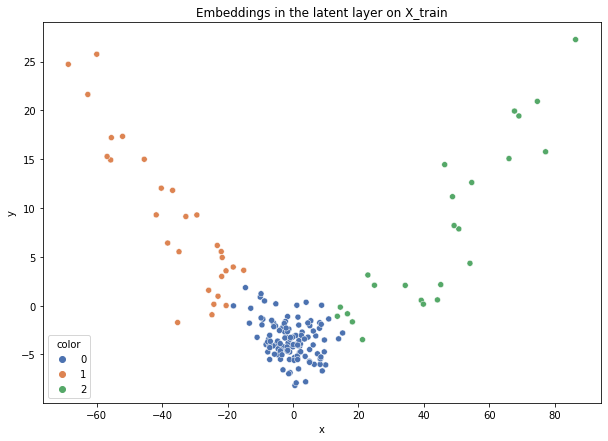

Softmax-f1: 0.969
Softmax-gmean: 0.95
Softmax-minority_gmean: 0.095


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


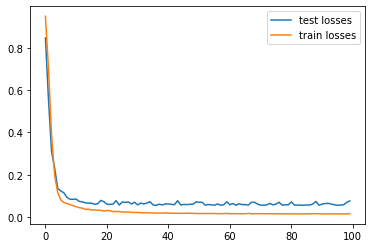

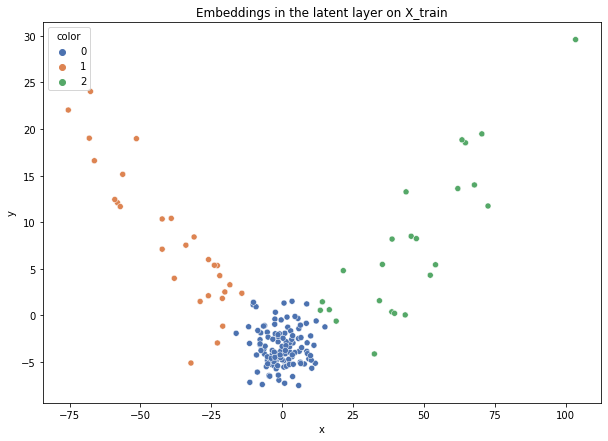

Softmax-f1: 0.972
Softmax-gmean: 0.989
Softmax-minority_gmean: 1.0


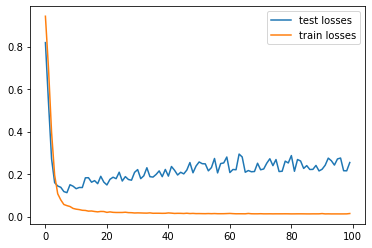

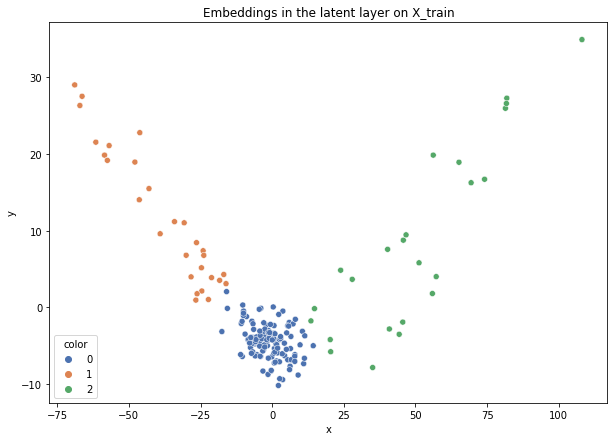

Softmax-f1: 0.882
Softmax-gmean: 0.917
Softmax-minority_gmean: 0.095


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


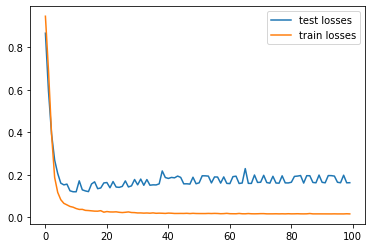

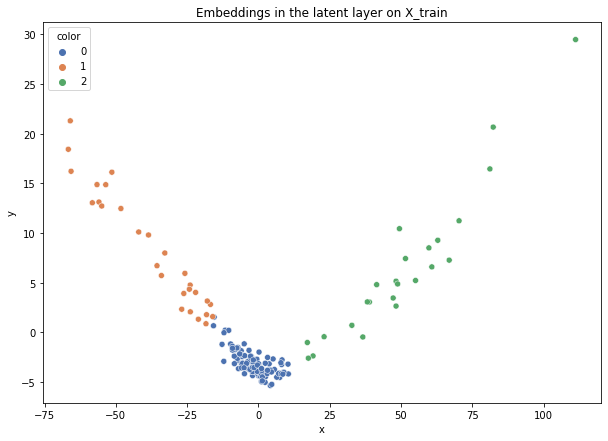

Softmax-f1: 0.923
Softmax-gmean: 0.874
Softmax-minority_gmean: 0.087


/home/dhorna/anaconda3/envs/mgr/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

result_dict = defaultdict(list)
std_dict = defaultdict(list)


safety_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)
    
    safety_dict["dataset"].append(dataset_name)
    fold_safety_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train_norm, X_test_norm = standardize(X_train, X_test)

        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        X_train_enc, X_test_enc = standardize(X_train_enc, X_test_enc)

        
        cfg = config[dataset_name]
        
        model = ex.train_classification(X_train_enc, y_train, X_test_enc, y_test, cfg)
        
        # Visualize embeddings
        dataset1 = TensorDataset(torch.Tensor(X_train_enc), torch.Tensor(y_train))
        test_loader1 = torch.utils.data.DataLoader(dataset1, batch_size=1)
        
        embeddings, labels = calc_embeddings(model, device, test_loader1)
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings), y_train)
        plt.title("Embeddings in the latent layer on X_train")
        plt.show() 
        
        dataset2 = TensorDataset(torch.Tensor(X_test_enc), torch.Tensor(y_test))
        test_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=1)
        
        preds = []
        model.eval()
        embeddings_test = []
        with torch.no_grad():
            for data, target in test_loader2:
                data, target = data.to(device), target.to(device)
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                preds.append(pred.item())
                embeddings_test.append(model.embed(data).cpu().numpy()[0])
#                 print(f"Pred: {pred.item()}, target: {target.item()}, output: {output}")

        
        s_dict = calc_safety5(np.array(embeddings_test), y_test)
        for k, v in s_dict.items():
            fold_safety_dict[f"emb-{k}"].append(v)
            
        s_dict = calc_safety5(X_test_enc, y_test)
        for k,v in s_dict.items():
            fold_safety_dict[f"raw-{k}"].append(v)
    
    
        clf_name = "Softmax"
        gmean = gmean_score(y_test, preds)
        f1 = f1_score(y_test, preds, average='macro')
        
        minority_classes = dt_name_minority_classes[dataset_name]
        minority_mask = np.argwhere([label in minority_classes for label in y_test]).ravel()
        gmean_minority = gmean_score(y_test[minority_mask], np.array(preds)[minority_mask])
        
        fold_result_dict[f"{clf_name}-f1"].append(f1)
        fold_result_dict[f"{clf_name}-gmean"].append(gmean)
        fold_result_dict[f"{clf_name}-minority_gmean"].append(gmean_minority)

            
        
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))
        
    for k in fold_result_dict:
        std_dict[f"{k}-std"].append(np.std(fold_result_dict[k]))
        
    for k in fold_safety_dict:
        safety_dict[k].append(np.sum(fold_safety_dict[k]) / X.shape[0])

In [13]:
results_df = pd.DataFrame.from_dict(result_dict)

In [14]:
std_df = pd.DataFrame.from_dict(std_dict)

In [15]:
safety_df = pd.DataFrame.from_dict(safety_dict)

In [16]:
results_df

dataset  Softmax-f1  Softmax-gmean  Softmax-minority_gmean
0                      cmc    0.520116       0.498607                0.007083
1              dermatology    0.959842       0.957365                1.000000
2               hayes-roth    0.885287       0.880109                1.000000
3              new_vehicle    0.980720       0.980794                0.458385
4                new_yeast    0.539041       0.285980                0.017691
5              1czysty-cut    0.972161       0.971204                0.277600
6           2delikatne-cut    0.791139       0.745136                0.075593
7             3mocniej-cut    0.620407       0.500444                0.050659
8   4delikatne-bezover-cut    0.851138       0.837389                0.085692
9            balance-scale    0.905884       0.922169                0.219354
10               cleveland    0.308852       0.095938                0.024947
11            cleveland_v2    0.317393       0.073566                0.013519
12                   glass    0.681705       0.498722                0.050053
13               new_ecoli    0.781798       0.752374                0.067434
14           new_led7digit    0.768148       0.753775                0.031564
15     new_winequality-red    0.497739       0.359126                0.013735
16      thyroid-newthyroid    0.941922       0.934085                0.274289

In [17]:
safety_df[sorted(safety_df.filter(regex=("dataset|emb")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [18]:
safety_df[sorted(safety_df.filter(regex=("dataset|raw")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [19]:
safety_df[sorted(safety_df.filter(regex=("dataset|.*safe")).columns)].style.highlight_max(color = 'lightgreen', axis = 1)

In [20]:
results_df.filter(regex=("dataset|Softmax-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [21]:
results_df.filter(regex=("dataset|Softmax-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [22]:
results_df.filter(regex=("dataset|Softmax-minority_gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

In [23]:
std_df.filter(regex=("dataset|Softmax-f1*"))

Softmax-f1-std
0         0.020724
1         0.026808
2         0.055780
3         0.019440
4         0.040856
5         0.016087
6         0.015156
7         0.040124
8         0.023699
9         0.031919
10        0.024233
11        0.034216
12        0.086894
13        0.015860
14        0.022087
15        0.053313
16        0.035013

In [24]:
std_df.filter(regex=("dataset|Softmax-gmean*"))

Softmax-gmean-std
0            0.027374
1            0.029846
2            0.060202
3            0.019063
4            0.024815
5            0.015337
6            0.024495
7            0.062390
8            0.035571
9            0.038355
10           0.006758
11           0.008395
12           0.229473
13           0.019836
14           0.028646
15           0.137225
16           0.038044

In [25]:
std_df.filter(regex=("dataset|Softmax-minority_gmean*"))

Softmax-minority_gmean-std
0                     0.000462
1                     0.000000
2                     0.000000
3                     0.442228
4                     0.003797
5                     0.361203
6                     0.002763
7                     0.006169
8                     0.003721
9                     0.390404
10                    0.001840
11                    0.001438
12                    0.052078
13                    0.032761
14                    0.023498
15                    0.005130
16                    0.362867